In [1]:
import pandas as pd

df = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V2_ml_input_data.csv')

def custom_av_metrcis(df):
    # convert all to floats  
    for col in ['total_gas', 'max_heated_vol', 'min_heated_vol', 'total_elec']:
        df[col] = df[col].astype(float)
    

    df['min_av_gas'] = df['total_gas'] / df['max_heated_vol']
    df['max_av_gas'] = df['total_gas'] / df['min_heated_vol']

    df['min_av_elec'] = df['total_elec'] / df['max_heated_vol']
    df['max_av_elec'] = df['total_elec'] / df['min_heated_vol']
    # calc min of two columns 
    df['ultra_min_heated_area'] = df[['min_heated_vol', 'clean_res_gross_area_total']].min(axis=1)  
    df['new_max_av_gas'] = df['total_gas'] / df['ultra_min_heated_area']    
    return df 


df = custom_av_metrcis(df)    

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_90906/36679217.py:3: DtypeWarning: Columns (140) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V2_ml_input_data.csv')


In [72]:
len(dd)

483839

In [41]:
df.columns.tolist() 

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [43]:
df[['num_meters_gas', 'all_res_uprn_count_total']]

,num_meters_gas,all_types_uprn_count_total,all_res_uprn_count_total
0,27.0,27.0,27.0
1,22.0,23.0,23.0
2,18.0,18.0,18.0
3,10.0,12.0,12.0
4,19.0,23.0,23.0
...,...,...,...
515304,11.0,10.0,10.0
515305,11.0,13.0,13.0
515306,40.0,44.0,44.0
515307,5.0,5.0,5.0


In [47]:
df.new_max_av_gas.mean(), df.new_max_av_gas.std()

(88.1394252086183, 28.589552894711698)

In [46]:
clean = df[df['num_meters_gas']==df['all_res_uprn_count_total']].copy() 
clean.new_max_av_gas.mean(), clean.new_max_av_gas.std()   

(88.66949103441684, 26.267902334742818)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pde_for_column(dfs, column_name, df_labels, ax=None, show_dotted_lines=True, alpha = 0.7 ):
    """
    Plot PDE (Probability Density Estimate) of a given column from multiple DataFrames on the same graph with different colors.

    Parameters:
    dfs (list of pd.DataFrame): The DataFrames containing the data.
    column_name (str): The column name for which to plot the PDE.
    df_labels (list of str): The labels for the DataFrames.
    ax (matplotlib.axes._subplots.AxesSubplot, optional): The axes on which to plot the PDE.
    show_dotted_lines (bool): Whether to show the dotted lines for mean and std deviation.

    Returns:
    None
    """
    if ax is None:
        ax = plt.gca()

    for df, label in zip(dfs, df_labels):
        # Get the descriptive statistics for the specified column
        desc_stats = df[column_name].describe()
        
        # Extract the mean and standard deviation
        mean_value = desc_stats['mean']
        std_value = desc_stats['std']

        # Plot the KDE for the column
        sns.kdeplot(df[column_name], ax=ax, fill=True, common_norm=False, alpha=alpha, label=f'{label} - PDE')
        
        if show_dotted_lines:
            ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label='Mean')
            ax.axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
            ax.axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=1, label='Mean - Std Dev')

    ax.set_title(f'PDE of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Density')
    ax.legend()

def plot_pde_multiple_columns(dfs, column_names, df_labels, show_dotted_lines=True, title ='', alpha=0.7):
    """
    Plot PDEs for multiple DataFrames and multiple columns to compare them on the same graphs with different colors.

    Parameters:
    dfs (list of pd.DataFrame): A list of DataFrames containing the data.
    column_names (list of str): A list of column names for which to plot the PDEs.
    df_labels (list of str): A list of labels for the DataFrames.
    show_dotted_lines (bool): Whether to show the dotted lines for mean and std deviation.

    Returns:
    None
    """
    nrows =  int(len(column_names) / 2 )
    fig, axs = plt.subplots(nrows , 2, figsize=(12 , 4 * nrows))
    axs=axs.ravel() 

    for j, column_name in enumerate(column_names):
        plot_pde_for_column(dfs, column_name, df_labels, ax=axs[j], show_dotted_lines=show_dotted_lines, alpha = alpha)
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_for_column(dfs, column_name, df_labels, ax=None, show_dotted_lines=True, alpha=0.7, bins=30):
    """
    Plot histogram of a given column from multiple DataFrames on the same graph with different colors.

    Parameters:
    dfs (list of pd.DataFrame): The DataFrames containing the data.
    column_name (str): The column name for which to plot the histogram.
    df_labels (list of str): The labels for the DataFrames.
    ax (matplotlib.axes._subplots.AxesSubplot, optional): The axes on which to plot the histogram.
    show_dotted_lines (bool): Whether to show the dotted lines for mean and std deviation.
    bins (int): Number of bins for the histogram.

    Returns:
    None
    """
    if ax is None:
        ax = plt.gca()

    colors = plt.cm.tab10(np.linspace(0, 1, len(dfs)))

    for df, label, color in zip(dfs, df_labels, colors):
        # Get the descriptive statistics for the specified column
        desc_stats = df[column_name].describe()
        
        # Extract the mean and standard deviation
        mean_value = desc_stats['mean']
        std_value = desc_stats['std']

        # Plot the histogram for the column
        sns.histplot(df[column_name], ax=ax, bins=bins, kde=False, alpha=alpha, label=label, color=color, stat='density')

        if show_dotted_lines:
            ax.axvline(mean_value, color=color, linestyle='dashed', linewidth=1, label=f'{label} - Mean')
            ax.axvline(mean_value + std_value, color=color, linestyle='dotted', linewidth=1, label=f'{label} - Mean + Std Dev')
            ax.axvline(mean_value - std_value, color=color, linestyle='dotted', linewidth=1, label=f'{label} - Mean - Std Dev')

    ax.set_title(f'Histogram of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Density')
    ax.legend()

def plot_histograms_multiple_columns(dfs, column_names, df_labels, show_dotted_lines=True, title='', alpha=0.7, bins=30):
    """
    Plot histograms for multiple DataFrames and multiple columns to compare them on the same graphs with different colors.

    Parameters:
    dfs (list of pd.DataFrame): A list of DataFrames containing the data.
    column_names (list of str): A list of column names for which to plot the histograms.
    df_labels (list of str): A list of labels for the DataFrames.
    show_dotted_lines (bool): Whether to show the dotted lines for mean and std deviation.
    bins (int): Number of bins for the histogram.

    Returns:
    None
    """
    nrows = int(np.ceil(len(column_names) / 2))
    fig, axs = plt.subplots(nrows, 2, figsize=(12, 4 * nrows))
    axs = axs.ravel()

    for j, column_name in enumerate(column_names):
        plot_histogram_for_column(dfs, column_name, df_labels, ax=axs[j], show_dotted_lines=show_dotted_lines, alpha=alpha, bins=bins)
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot histograms for columns 'A' and 'B' in both dataframes



In [332]:

df

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
0,0,PL6 7LP,46.0,27.0,0.0,0.0,46.0,2730.499987,5577.799982,5577.799971,...,1.0,0.0,0.0,0.0,57.252682,61.077027,15.117722,16.127551,4970.295842,61.077027
1,1,PL4 9PS,22.0,23.0,0.0,0.0,22.0,1391.699991,2777.499994,2777.499979,...,1.0,0.0,0.0,0.0,52.240572,53.768039,18.044807,18.572421,2604.253928,53.768039
2,2,PL1 3DT,2.0,18.0,0.0,0.0,2.0,788.899979,3155.599915,3155.599915,...,1.0,0.0,0.0,0.0,34.495390,39.596955,10.151128,11.652391,2749.040914,39.596955
3,3,PL4 8PB,2.0,12.0,0.0,0.0,2.0,331.000000,772.299988,772.300003,...,1.0,0.0,0.0,0.0,135.901261,149.419917,25.556519,28.098731,702.426735,149.419917
4,4,PL4 8PE,19.0,23.0,0.0,0.0,19.0,739.699988,2223.800025,2223.799963,...,1.0,0.0,0.0,0.0,54.504274,63.454501,36.939660,43.005576,1881.874575,63.454501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515304,515304,W8 7NU,11.0,10.0,0.0,0.0,11.0,534.799999,1069.599998,1069.599998,...,0.0,0.0,0.0,0.0,134.861275,137.717939,29.654637,30.282789,1047.413432,137.717939
515305,515305,W8 5AJ,7.0,13.0,0.0,0.0,7.0,385.499992,1414.999962,1414.999969,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1414.999962,72.199349
515306,515306,W8 7AY,7.0,44.0,0.0,0.0,7.0,588.099995,2870.999969,3528.599968,...,0.0,0.0,0.0,0.0,84.206882,102.524169,20.409086,24.848617,2870.999969,103.494393
515307,515307,W8 7BA,5.0,5.0,0.0,0.0,5.0,268.099995,804.300018,804.299984,...,0.0,0.0,0.0,0.0,108.812770,129.539565,15.060799,17.929599,675.609099,129.539565


In [19]:
df['perc_excl_outbuilds'] = [100 - x for x in df['Domestic outbuilding_pct']]

In [20]:
df['perc_excl_outbuilds'].describe() 

count    515309.000000
mean         90.720700
std          12.113955
min           8.695652
25%          84.615385
50%          95.833333
75%         100.000000
max         100.000000
Name: perc_excl_outbuilds, dtype: float64

In [3]:
# 126-166 KwH/m2/year

col = 'Large semi detached_pct'
# df[df[col]== df['perc_excl_outbuilds'] ][['Standard size detached_pct', 'Large semi detached_pct']]
df[df[col] ==100]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_EE,region_EM,region_LN,region_NE,region_NW,region_SC,region_SW,region_WA,region_WM,region_YH
861,861,BA2 2BB,11.0,15.0,0.0,0.0,11.0,1044.800003,2089.600006,2089.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
952,952,BA2 3JF,6.0,7.0,0.0,0.0,6.0,598.000000,1196.000000,1196.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3312,3312,DT6 5DW,8.0,8.0,0.0,0.0,8.0,452.199997,904.399994,904.399994,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3616,3616,TA2 7LA,6.0,6.0,0.0,0.0,6.0,308.500000,617.000000,617.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7121,7121,GL1 4UH,6.0,28.0,0.0,0.0,6.0,621.800003,1516.199982,1865.400009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512218,512218,N8 9AN,11.0,17.0,0.0,0.0,11.0,924.800011,1931.300034,2774.400032,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512257,512257,W4 4NH,6.0,8.0,0.0,0.0,6.0,928.300003,2009.699982,2784.900009,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512895,512895,W7 1HS,10.0,14.0,0.0,0.0,10.0,669.400002,1338.800003,1338.800003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513417,513417,W3 6PS,2.0,8.0,0.0,0.0,2.0,259.600006,778.799988,778.800018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
data = df[df['Standard size detached_pct']==100].copy() 


data[['new_max_av_gas',  'min_av_gas', 'max_av_gas', 'min_av_elec', 'max_av_elec']].describe()



,new_max_av_gas,min_av_gas,max_av_gas,min_av_elec,max_av_elec
count,17058.000000,17057.000000,17057.000000,16727.000000,16727.000000
mean,76.755355,72.096881,74.902931,17.627768,18.304298
std,21.540485,19.774632,21.435375,6.092924,6.620714
min,19.043303,18.823738,19.043303,2.956613,3.344832
25%,62.953975,58.932733,61.149519,13.484743,13.981027
50%,74.188219,70.572214,72.649988,17.001060,17.575526
75%,87.348847,83.032104,85.874435,20.837949,21.473706
max,400.886210,344.684784,400.886210,133.977710,158.547765


In [55]:
data [data['min_av_gas'] < 30][['total_gas', 'max_heated_vol']].describe() 

,total_gas,max_heated_vol
count,67.000000,67.000000
mean,59266.262457,2204.658669
std,34095.995583,1274.868895
min,21965.564715,837.683698
25%,38323.598915,1397.429402
50%,51714.594713,1882.747098
75%,66755.935675,2511.318359
max,219175.087792,8209.931674


In [56]:
data[['total_gas', 'max_heated_vol']].describe() 

,total_gas,max_heated_vol
count,1.705800e+04,17057.000000
mean,1.785821e+05,2540.491731
std,1.244289e+05,1722.817466
min,1.517260e+04,326.528686
25%,9.605672e+04,1401.600279
50%,1.421262e+05,2030.390671
75%,2.222233e+05,3113.358937
max,1.355999e+06,21770.157155


In [50]:
data[['num_meters_gas']].describe()

,num_meters_gas
count,17058.000000
mean,12.508325
std,8.337973
min,5.000000
25%,7.000000
50%,10.000000
75%,15.000000
max,94.000000


In [24]:
data.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [108]:
data.new_max_av_gas.describe()

count    251.000000
mean     109.684046
std       34.105096
min       35.047279
25%       86.537746
50%      106.410217
75%      133.020456
max      229.589966
Name: new_max_av_gas, dtype: float64

In [106]:
data.min_av_gas.describe()

count    251.000000
mean      92.905827
std       27.739318
min       33.487103
25%       73.573011
50%       92.496758
75%      107.269021
max      195.219094
Name: min_av_gas, dtype: float64

In [111]:
col

'Large semi detached_pct'

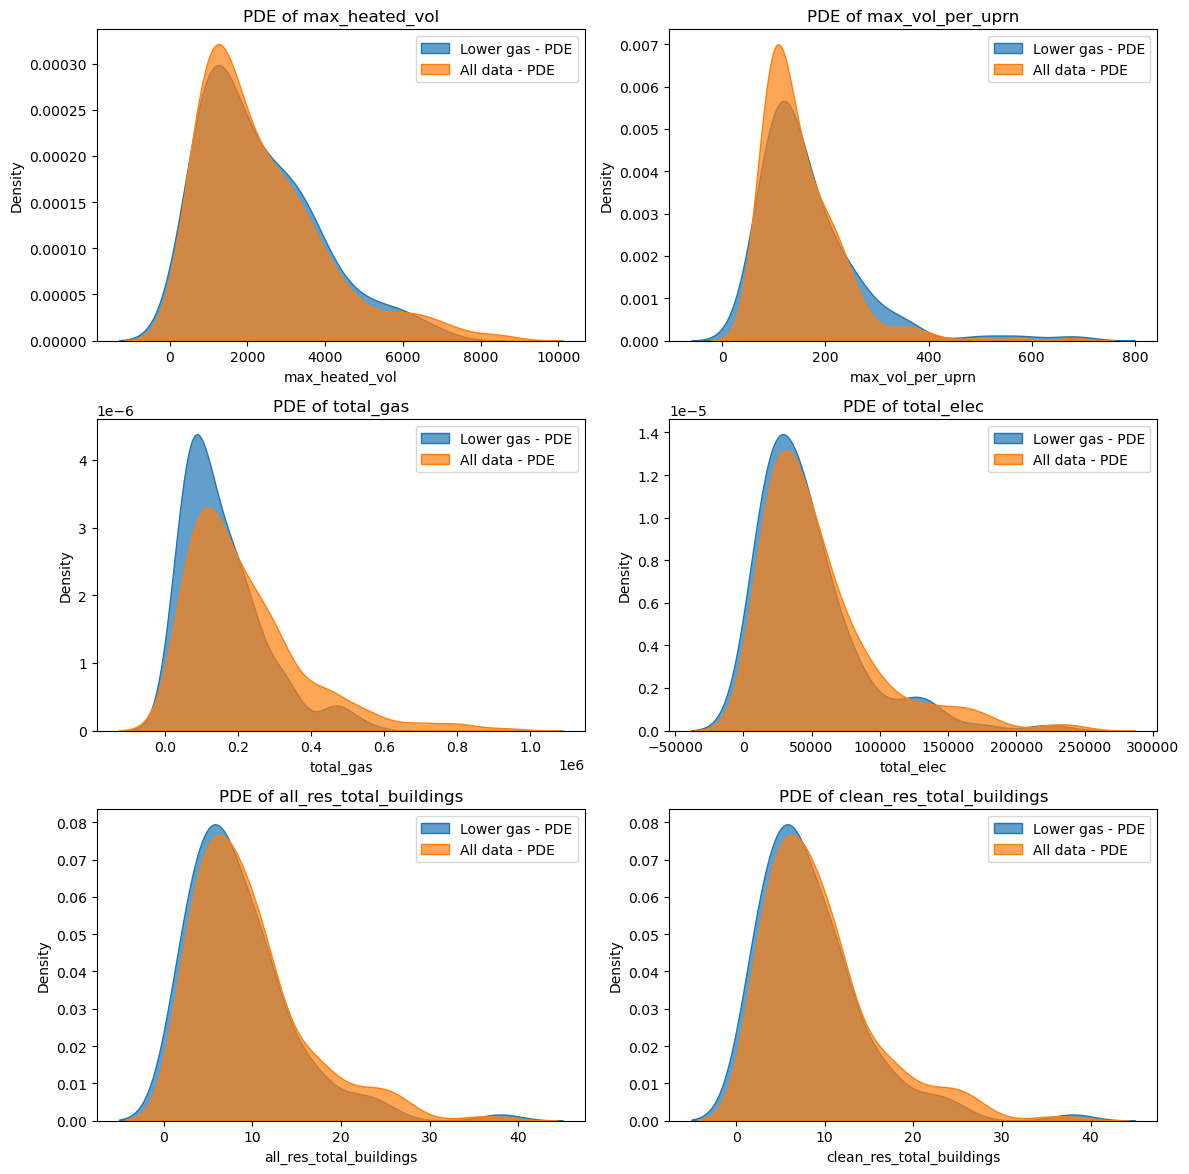

In [3]:
col= 'Large semi detached_pct'

data = df[df[col]==100]

columns = ['max_heated_vol', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings' ]
dfs = [data [data['min_av_gas'] < 86] , data]
df_labels = ['Lower gas', 'All data']
# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False)


In [112]:
data

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
861,861,BA2 2BB,11.0,15.0,0.0,0.0,11.0,1044.800003,2089.600006,2089.600006,...,1.0,0.0,0.0,0.0,74.649225,90.238578,17.620401,21.300153,2089.600006,90.238578
952,952,BA2 3JF,6.0,7.0,0.0,0.0,6.0,598.000000,1196.000000,1196.000000,...,1.0,0.0,0.0,0.0,72.503912,73.178633,11.715640,11.824666,1196.000000,73.178633
3312,3312,DT6 5DW,8.0,8.0,0.0,0.0,8.0,452.199997,904.399994,904.399994,...,1.0,0.0,0.0,0.0,59.505018,60.130831,32.423926,32.764927,904.399994,60.130831
3616,3616,TA2 7LA,6.0,6.0,0.0,0.0,6.0,308.500000,617.000000,617.000000,...,1.0,0.0,0.0,0.0,52.082941,52.630695,28.919838,29.223987,617.000000,52.630695
7121,7121,GL1 4UH,6.0,28.0,0.0,0.0,6.0,621.800003,1516.199982,1865.400009,...,1.0,0.0,0.0,0.0,66.593360,72.950807,38.235013,41.885183,1516.199982,89.752300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512218,512218,N8 9AN,11.0,17.0,0.0,0.0,11.0,924.800011,1931.300034,2774.400032,...,0.0,0.0,0.0,0.0,80.457555,90.758563,16.353145,18.446843,1931.300034,130.378790
512257,512257,W4 4NH,6.0,8.0,0.0,0.0,6.0,928.300003,2009.699982,2784.900009,...,0.0,0.0,0.0,0.0,60.731366,61.424021,13.655737,13.811483,2009.699982,85.117061
512895,512895,W7 1HS,10.0,14.0,0.0,0.0,10.0,669.400002,1338.800003,1338.800003,...,0.0,0.0,0.0,0.0,96.873885,97.890917,20.885528,21.104795,1338.800003,97.890917
513417,513417,W3 6PS,2.0,8.0,0.0,0.0,2.0,259.600006,778.799988,778.800018,...,0.0,0.0,0.0,0.0,56.230887,69.950009,18.965940,23.593220,778.799988,69.950011


In [125]:
data[data['min_av_gas'] < data['max_av_gas']]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
861,861,BA2 2BB,11.0,15.0,0.0,0.0,11.0,1044.800003,2089.600006,2089.600006,...,1.0,0.0,0.0,0.0,74.649225,90.238578,17.620401,21.300153,2089.600006,90.238578
952,952,BA2 3JF,6.0,7.0,0.0,0.0,6.0,598.000000,1196.000000,1196.000000,...,1.0,0.0,0.0,0.0,72.503912,73.178633,11.715640,11.824666,1196.000000,73.178633
3312,3312,DT6 5DW,8.0,8.0,0.0,0.0,8.0,452.199997,904.399994,904.399994,...,1.0,0.0,0.0,0.0,59.505018,60.130831,32.423926,32.764927,904.399994,60.130831
3616,3616,TA2 7LA,6.0,6.0,0.0,0.0,6.0,308.500000,617.000000,617.000000,...,1.0,0.0,0.0,0.0,52.082941,52.630695,28.919838,29.223987,617.000000,52.630695
7121,7121,GL1 4UH,6.0,28.0,0.0,0.0,6.0,621.800003,1516.199982,1865.400009,...,1.0,0.0,0.0,0.0,66.593360,72.950807,38.235013,41.885183,1516.199982,89.752300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512218,512218,N8 9AN,11.0,17.0,0.0,0.0,11.0,924.800011,1931.300034,2774.400032,...,0.0,0.0,0.0,0.0,80.457555,90.758563,16.353145,18.446843,1931.300034,130.378790
512257,512257,W4 4NH,6.0,8.0,0.0,0.0,6.0,928.300003,2009.699982,2784.900009,...,0.0,0.0,0.0,0.0,60.731366,61.424021,13.655737,13.811483,2009.699982,85.117061
512895,512895,W7 1HS,10.0,14.0,0.0,0.0,10.0,669.400002,1338.800003,1338.800003,...,0.0,0.0,0.0,0.0,96.873885,97.890917,20.885528,21.104795,1338.800003,97.890917
513417,513417,W3 6PS,2.0,8.0,0.0,0.0,2.0,259.600006,778.799988,778.800018,...,0.0,0.0,0.0,0.0,56.230887,69.950009,18.965940,23.593220,778.799988,69.950011


In [128]:
data['min_av_gas'].mean(), data['max_av_gas'].mean()

(92.90582720298086, 105.30291155809739)

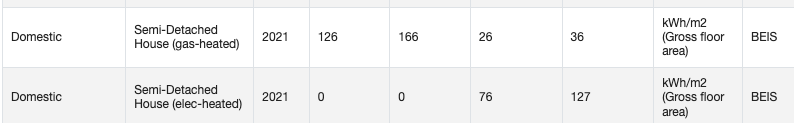

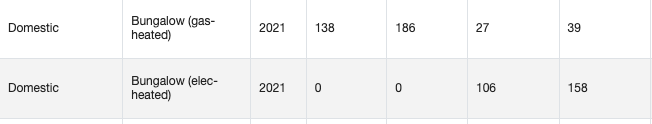

For pcs with wholly "Large semi detached_pct" the range is  92.90582720298086 - 105.30291155809739
EUI elec  23.23116538479978 - 26.482933554319406


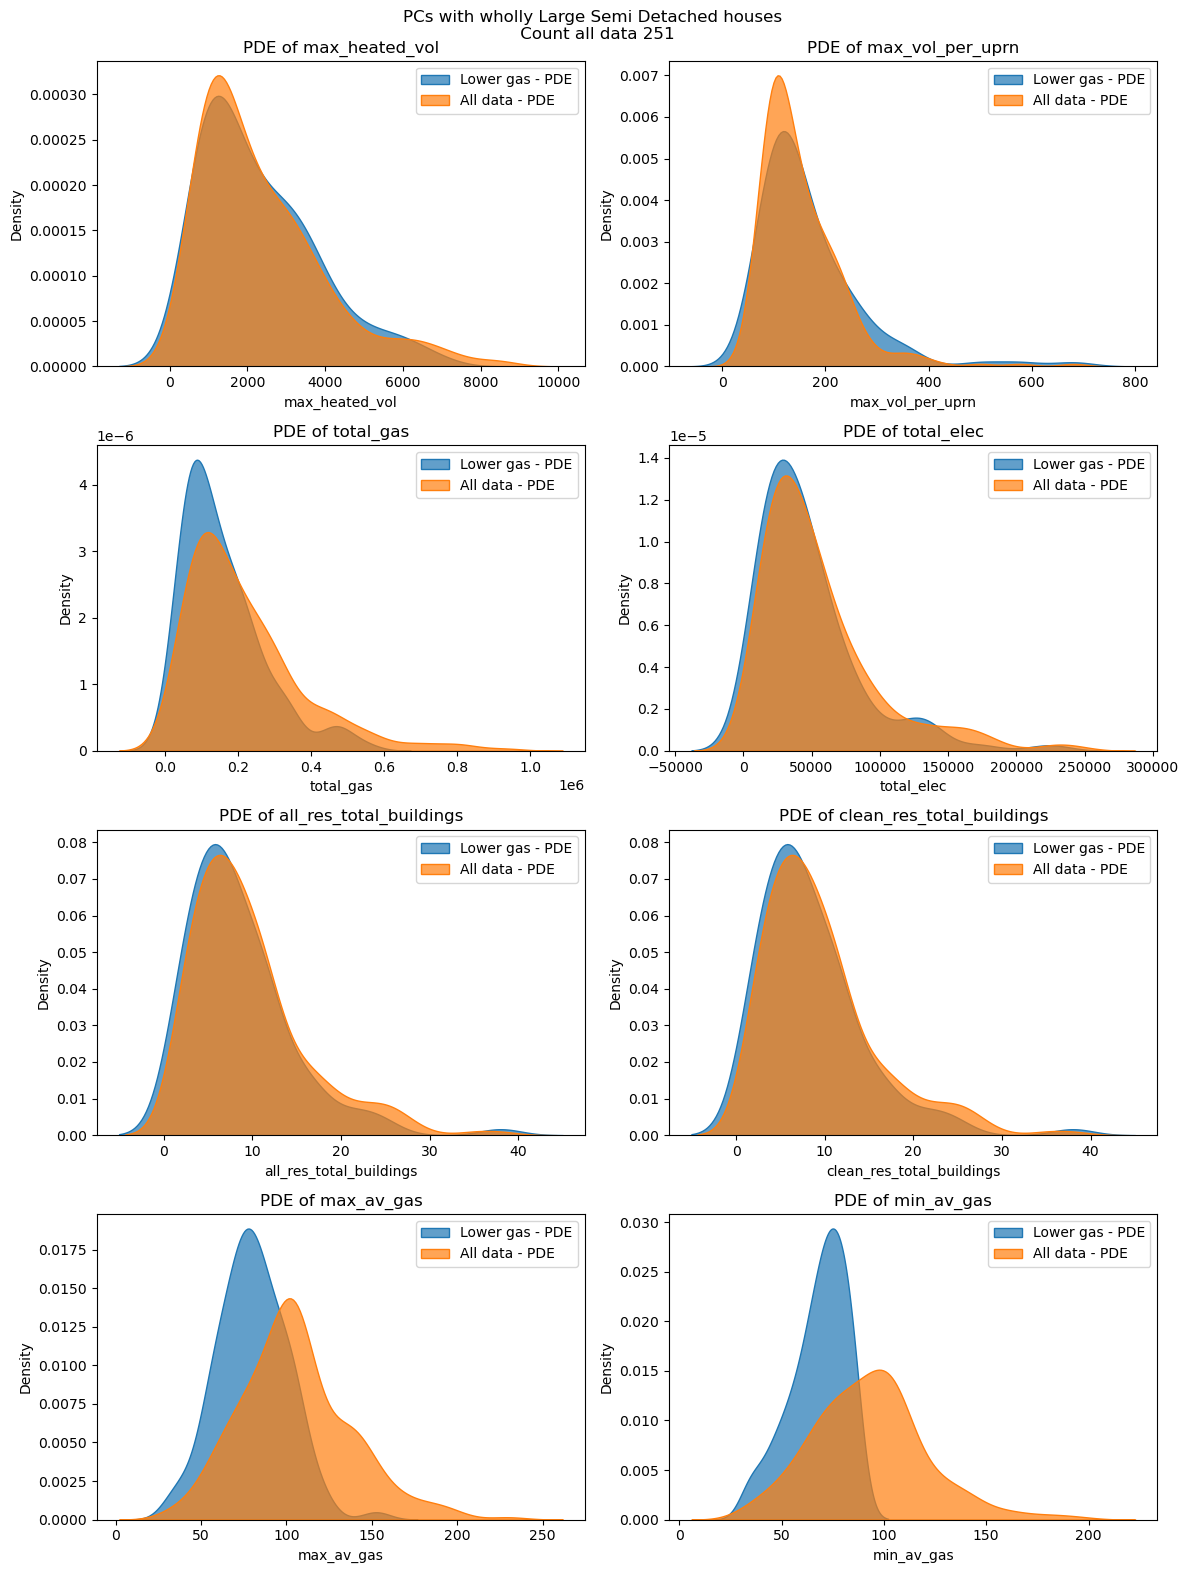

In [135]:
col= 'Large semi detached_pct'

data = df[df[col]==100]
c =len(data)
print(f'For pcs with wholly "{col}" the range is ', data['min_av_gas'].mean() , '-',  data['max_av_gas'].mean())    
print('EUI elec ', data['min_av_elec'].mean(), '-' , data['max_av_elec'].mean() )
columns = ['max_heated_vol', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings', 'max_av_gas', 'min_av_gas' ]
dfs = [data [data['min_av_gas'] < 86] , data]
df_labels = ['Lower gas', 'All data']
# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs with wholly Large Semi Detached houses \n Count all data {c}')


In [137]:
df.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
col= 'Large semi detached_pct'

data = df[df[col]==100]
c =len(data)
print(f'For pcs with wholly "{col}" the range is ', data['min_av_gas'].mean() , '-',  data['max_av_gas'].mean())    
print('EUI elec ', data['min_av_elec'].mean(), '-' , data['max_av_elec'].mean() )
columns = ['max_heated_vol', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings', 'max_av_gas', 'min_av_gas' ]
dfs = [data [data['min_av_gas'] < 86] , data]
df_labels = ['Lower gas', 'All data']
# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs with wholly Large Semi Detached houses \n Count all data {c}')


In [147]:
df.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [177]:
import pandas as pd

cols = [
    'Large semi detached_pct',
    '2 storeys terraces with t rear extension_pct',
    '3-4 storey and smaller flats_pct',
    # 'Domestic outbuilding_pct',  # Commented out
    'Large detached_pct',
    'Linked and step linked premises_pct',
    'Medium height flats 5-6 storeys_pct',
    'None_type_pct',
    'Planned balanced mixed estates_pct',
    'Semi type house in multiples_pct',
    'Small low terraces_pct',
    'Standard size detached_pct',
    'Standard size semi detached_pct',
    'Tall flats 6-15 storeys_pct',
    'Tall terraces 3-4 storeys_pct',
    'Unknown_pct',
    'Very large detached_pct',
    'Very tall point block flats_pct'
]

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['name', 'mean_min_av_gas', 'std_min_av_gas', 'mean_max_av_gas', 'std_max_av_gas', 'mean_min_av_elec', 'std_min_av_elec', 'mean_max_av_elec', 'std_max_av_elec'])

for c in cols:
    d = df[df[c] == 100].copy() 
    if d.empty:
        continue
    
    means = d[['min_av_gas', 'max_av_gas', 'min_av_elec', 'max_av_elec']].mean()
    stds = d[['min_av_gas', 'max_av_gas', 'min_av_elec', 'max_av_elec']].std()
    
    result_df = result_df.append({
        'name': c,
        'mean_min_av_gas': means['min_av_gas'],
        'std_min_av_gas': stds['min_av_gas'],
        'mean_max_av_gas': means['max_av_gas'],
        'std_max_av_gas': stds['max_av_gas'],
        'mean_min_av_elec': means['min_av_elec'],
        'std_min_av_elec': stds['min_av_elec'],
        'mean_max_av_elec': means['max_av_elec'],
        'std_max_av_elec': stds['max_av_elec']
    }, ignore_index=True)

# Display the result DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Results Table", dataframe=result_df)

# Optionally, print the result DataFrame
result_df


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/929556088.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/929556088.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/929556088.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/929556088.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/fol

,name,mean_min_av_gas,std_min_av_gas,mean_max_av_gas,std_max_av_gas,mean_min_av_elec,std_min_av_elec,mean_max_av_elec,std_max_av_elec
0,Large semi detached_pct,92.905827,27.739318,105.302912,32.382013,23.231165,8.213979,26.482934,10.158961
1,2 storeys terraces with t rear extension_pct,98.984265,25.428180,104.014053,25.826894,24.385928,7.391539,25.650432,7.676031
2,3-4 storey and smaller flats_pct,64.453471,22.177001,81.676564,28.828929,20.180949,8.376845,25.602646,11.029444
3,Large detached_pct,65.770397,26.063777,71.364006,30.116125,14.809768,6.280646,16.090591,7.446519
4,Linked and step linked premises_pct,80.944809,22.616837,85.904710,24.308059,24.249133,8.559266,25.700896,9.077257
5,Medium height flats 5-6 storeys_pct,66.261223,24.639921,80.723129,28.468339,20.855597,8.167466,25.441134,9.617732
6,Planned balanced mixed estates_pct,84.291507,21.298104,87.726915,22.445205,24.482799,7.860009,25.495293,8.300459
7,Semi type house in multiples_pct,91.805998,27.218572,94.735999,28.515519,26.761997,8.907878,27.608431,9.331252
8,Small low terraces_pct,90.063346,27.538357,93.675440,28.674223,25.446808,8.883875,26.439449,9.177753
9,Standard size detached_pct,72.096881,19.774632,74.902931,21.435375,17.627768,6.092924,18.304298,6.620714


In [66]:
df.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [67]:
df.density 

AttributeError: 'DataFrame' object has no attribute 'density'

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/2657147096.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/2657147096.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/2657147096.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_68806/2657147096.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/var

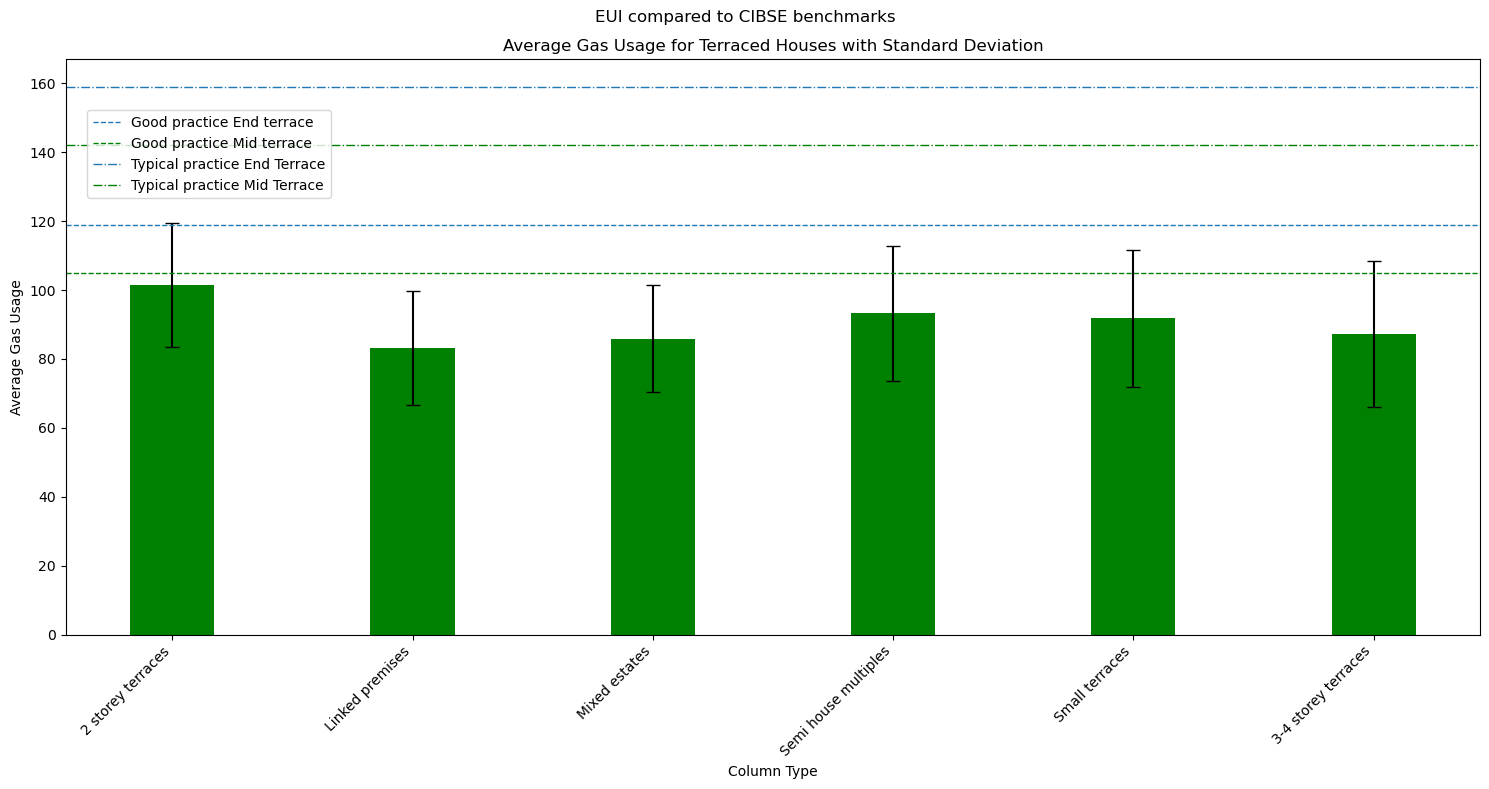

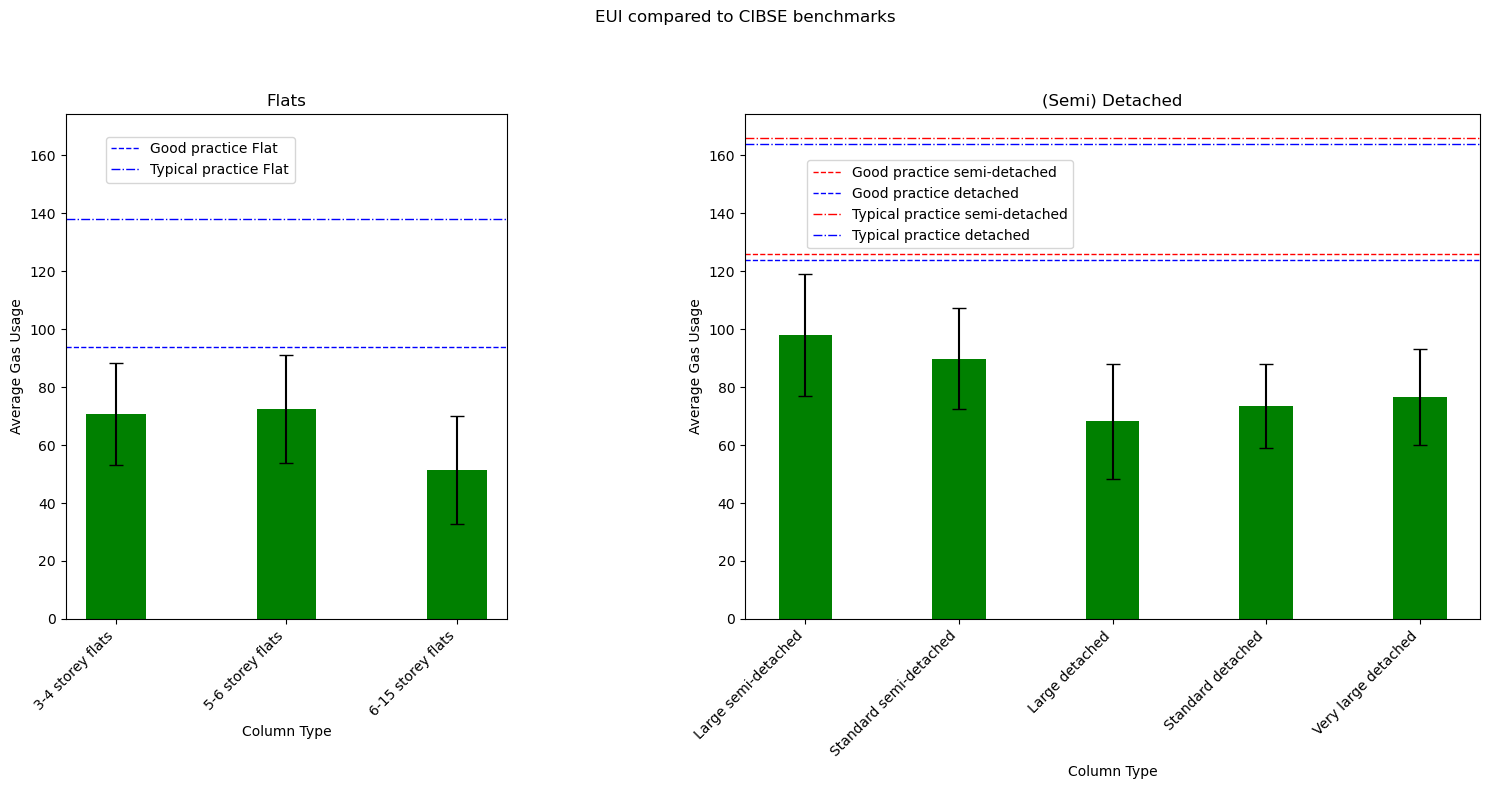

In [309]:
from matplotlib.gridspec import GridSpec
# Define column groupings and their shorter names
groupings = {
    'Flats': {
        '3-4 storey and smaller flats_pct': '3-4 storey flats',
        'Medium height flats 5-6 storeys_pct': '5-6 storey flats',
        'Tall flats 6-15 storeys_pct': '6-15 storey flats'
    },
    '(Semi) Detached': {
        'Large semi detached_pct': 'Large semi-detached',
        'Standard size semi detached_pct': 'Standard semi-detached',
        'Large detached_pct': 'Large detached',
        'Standard size detached_pct': 'Standard detached',
        'Very large detached_pct': 'Very large detached'
    },
    'Terraced Houses': {
        '2 storeys terraces with t rear extension_pct': '2 storey terraces',
        'Linked and step linked premises_pct': 'Linked premises',
        'Planned balanced mixed estates_pct': 'Mixed estates',
        'Semi type house in multiples_pct': 'Semi house multiples',
        'Small low terraces_pct': 'Small terraces',
        'Tall terraces 3-4 storeys_pct': '3-4 storey terraces'
    }
}

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['name', 'short_name', 'group', 'mean_av_gas', 'std_av_gas'])

for group, cols in groupings.items():
    for c, short_c in cols.items():
        d = df[df[c] == 100].copy() 
        if d.empty:
            continue
        
        # Calculate means and standard deviations for min and max values
        mean_min_gas = d['min_av_gas'].mean()
        std_min_gas = d['min_av_gas'].std()
        mean_max_gas = d['max_av_gas'].mean()
        std_max_gas = d['max_av_gas'].std()
        
        # Calculate combined mean and standard deviation for gas
        weight_mean_gas = (mean_min_gas / std_min_gas**2 + mean_max_gas / std_max_gas**2) / (1 / std_min_gas**2 + 1 / std_max_gas**2)
        weight_std_gas = np.sqrt(1 / (1 / std_min_gas**2 + 1 / std_max_gas**2))
        
        result_df = result_df.append({
            'name': c,
            'short_name': short_c,
            'group': group,
            'mean_av_gas': weight_mean_gas,
            'std_av_gas': weight_std_gas
        }, ignore_index=True)

# Separate terraced houses data
terraced_df = result_df[result_df['group'] == 'Terraced Houses']

# Plotting the results for terraced houses in its own figure
fig_terraced, ax_terraced = plt.subplots(figsize=(15, 8))

# Define the width of the bars and their positions
bar_width = 0.35
index_terraced = np.arange(len(terraced_df))

# Plot Gas for Terraced Houses
bars_terraced = ax_terraced.bar(index_terraced, terraced_df['mean_av_gas'], bar_width, yerr=terraced_df['std_av_gas'], capsize=5, color='green')

# Customizing the plot for Terraced Houses
ax_terraced.set_xlabel('Column Type')
ax_terraced.set_ylabel('Average Gas Usage')
ax_terraced.set_title('Average Gas Usage for Terraced Houses with Standard Deviation')
ax_terraced.set_xticks(index_terraced)
ax_terraced.set_xticklabels(terraced_df['short_name'], rotation=45, ha='right')

# Add horizontal lines for Terraced Houses
ax_terraced.axhline(119, linestyle='dashed', linewidth=1, label='Good practice End terrace')
ax_terraced.axhline(105, color='g', linestyle='dashed', linewidth=1, label='Good practice Mid terrace')
ax_terraced.axhline(159, linestyle='dashdot', linewidth=1, label='Typical practice End Terrace')
ax_terraced.axhline(142, color='g', linestyle='dashdot', linewidth=1, label='Typical practice Mid Terrace')
ax_terraced.legend(bbox_to_anchor=(0.01, 0.835))

fig_terraced.suptitle('EUI compared to CIBSE benchmarks')
plt.tight_layout()

# Plotting the results for the other three groups in one figure
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(1, 2, width_ratios=[3, 5])

ax_flats = fig.add_subplot(gs[0])
ax_semi_detached = fig.add_subplot(gs[1], sharey=ax_flats)

axs = [ax_flats, ax_semi_detached]

for i, group in enumerate(['Flats', '(Semi) Detached']):
    subset = result_df[result_df['group'] == group]
    
    ax = axs[i]
    
    # Define the width of the bars and their positions
    index = np.arange(len(subset))

    # Plot Gas
    bars = ax.bar(index, subset['mean_av_gas'], bar_width, yerr=subset['std_av_gas'], capsize=5, color='green')

    # Customizing the plot
    ax.set_xlabel('Column Type')
    ax.set_ylabel('Average Gas Usage')
    ax.set_title(f'{group}')
    ax.set_xticks(index)
    ax.set_xticklabels(subset['short_name'], rotation=45, ha='right')

    # Add horizontal lines for each subset
    if group == '(Semi) Detached':
        ax.axhline(126, color='r', linestyle='dashed', linewidth=1, label='Good practice semi-detached')
        ax.axhline(124, color='b', linestyle='dashed', linewidth=1, label='Good practice detached')
        ax.axhline(166, color='r', linestyle='dashdot', linewidth=1, label='Typical practice semi-detached')
        ax.axhline(164, color='b', linestyle='dashdot', linewidth=1, label='Typical practice detached')
        ax.legend(bbox_to_anchor=(0.075, 0.72))
    elif group == 'Flats':
        ax.axhline(94, color='b', linestyle='dashed', linewidth=1, label='Good practice Flat')
        ax.axhline(138, color='b', linestyle='dashdot', linewidth=1, label='Typical practice Flat')
        ax.legend(bbox_to_anchor=(0.075, 0.85))


   
fig.suptitle('EUI compared to CIBSE benchmarks')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [334]:
df.columns.tolist() 

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [55]:
data.max_av_gas.median()

66.30438511610124

In [56]:
data[data['max_av_gas']==66.30438511610124]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
170766,170766,CW3 9HN,26.0,25.0,0.0,0.0,26.0,3609.499992,6692.099991,7400.709508,...,0.0,0.0,1.0,0.0,65.266862,66.304385,13.198325,13.408133,6692.099991,73.325189


In [359]:
data.min_av_gas.mean(),  data.min_av_gas.median(), 

(65.77039681312164, 60.569417674066756)

In [364]:
data.sort_values('min_av_gas')

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
324211,324211,TR10 8AY,5.0,5.0,0.0,0.0,5.0,1022.199997,1919.000000,2044.399994,...,1.0,0.0,0.0,0.0,15.351538,24.924448,NaN,NaN,1919.000000,26.553174
351672,351672,NR11 8LY,6.0,6.0,0.0,0.0,6.0,1018.099976,2036.199951,2036.199951,...,0.0,0.0,0.0,0.0,18.906228,19.111469,10.083445,10.192909,2036.199951,19.111469
24377,24377,TR3 6BZ,5.0,5.0,0.0,0.0,5.0,848.599991,1358.499985,1697.199982,...,1.0,0.0,0.0,0.0,20.485680,20.714896,11.349034,11.476019,1358.499985,25.879516
367718,367718,EN11 0HU,3.0,5.0,0.0,0.0,3.0,777.000015,1554.000031,1554.000031,...,0.0,0.0,0.0,0.0,23.605148,23.843068,NaN,NaN,1554.000031,23.843068
309111,309111,TR27 4JN,6.0,6.0,0.0,0.0,6.0,1081.600006,1613.600006,2163.200012,...,1.0,0.0,0.0,0.0,28.343579,28.802365,7.569342,7.691864,1613.600006,37.997540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175828,175828,B92 7JG,5.0,15.0,0.0,0.0,5.0,568.900005,1137.800011,1137.800011,...,0.0,0.0,1.0,0.0,126.747497,126.997118,22.769116,22.813958,1135.563593,126.997118
188100,188100,B93 9DB,5.0,5.0,0.0,0.0,5.0,598.099991,1196.199982,1196.199982,...,0.0,0.0,1.0,0.0,135.957334,137.084257,20.436193,20.605585,1196.199982,137.084257
97148,97148,OL4 1DX,5.0,5.0,0.0,0.0,5.0,225.500004,451.000008,451.000008,...,0.0,0.0,0.0,0.0,159.600386,161.554047,26.023349,26.341900,451.000008,161.554047
290689,290689,SR2 9AJ,2.0,8.0,0.0,0.0,2.0,265.799995,360.399994,531.599991,...,0.0,0.0,0.0,0.0,182.351984,183.778188,34.896371,35.169301,360.399994,271.077926


,total_gas,total_elec,median_gas,avg_gas,num_meters_gas,clean_res_total_buildings,max_heated_vol,clean_res_heated_vol_h_total,clean_res_heated_vol_fc_total,clean_res_premise_area_total,all_res_gross_area_total
324211,50955.54154,NaN,8761.55009,10191.108308,5.0,5.0,3319.246699,3319.246699,2044.399994,1022.199997,1919.0


In [21]:
50955.54154 / 1919.0

26.553174330380404

In [373]:
50955.54154 / 2044.399994,  50955.54154 / 3319.246699, 50955.54154 /1022.199997

(24.92444809701951, 15.351537912307494, 49.84889619403902)

In [25]:
50955.54154 / 1022.1999969482422

49.848896196563054

In [24]:
up.premise_area.sum()

1022.1999969482422

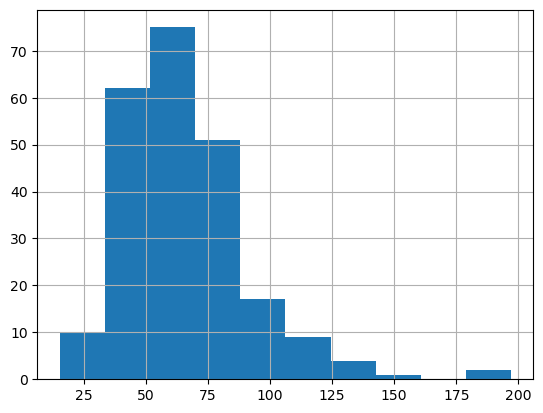

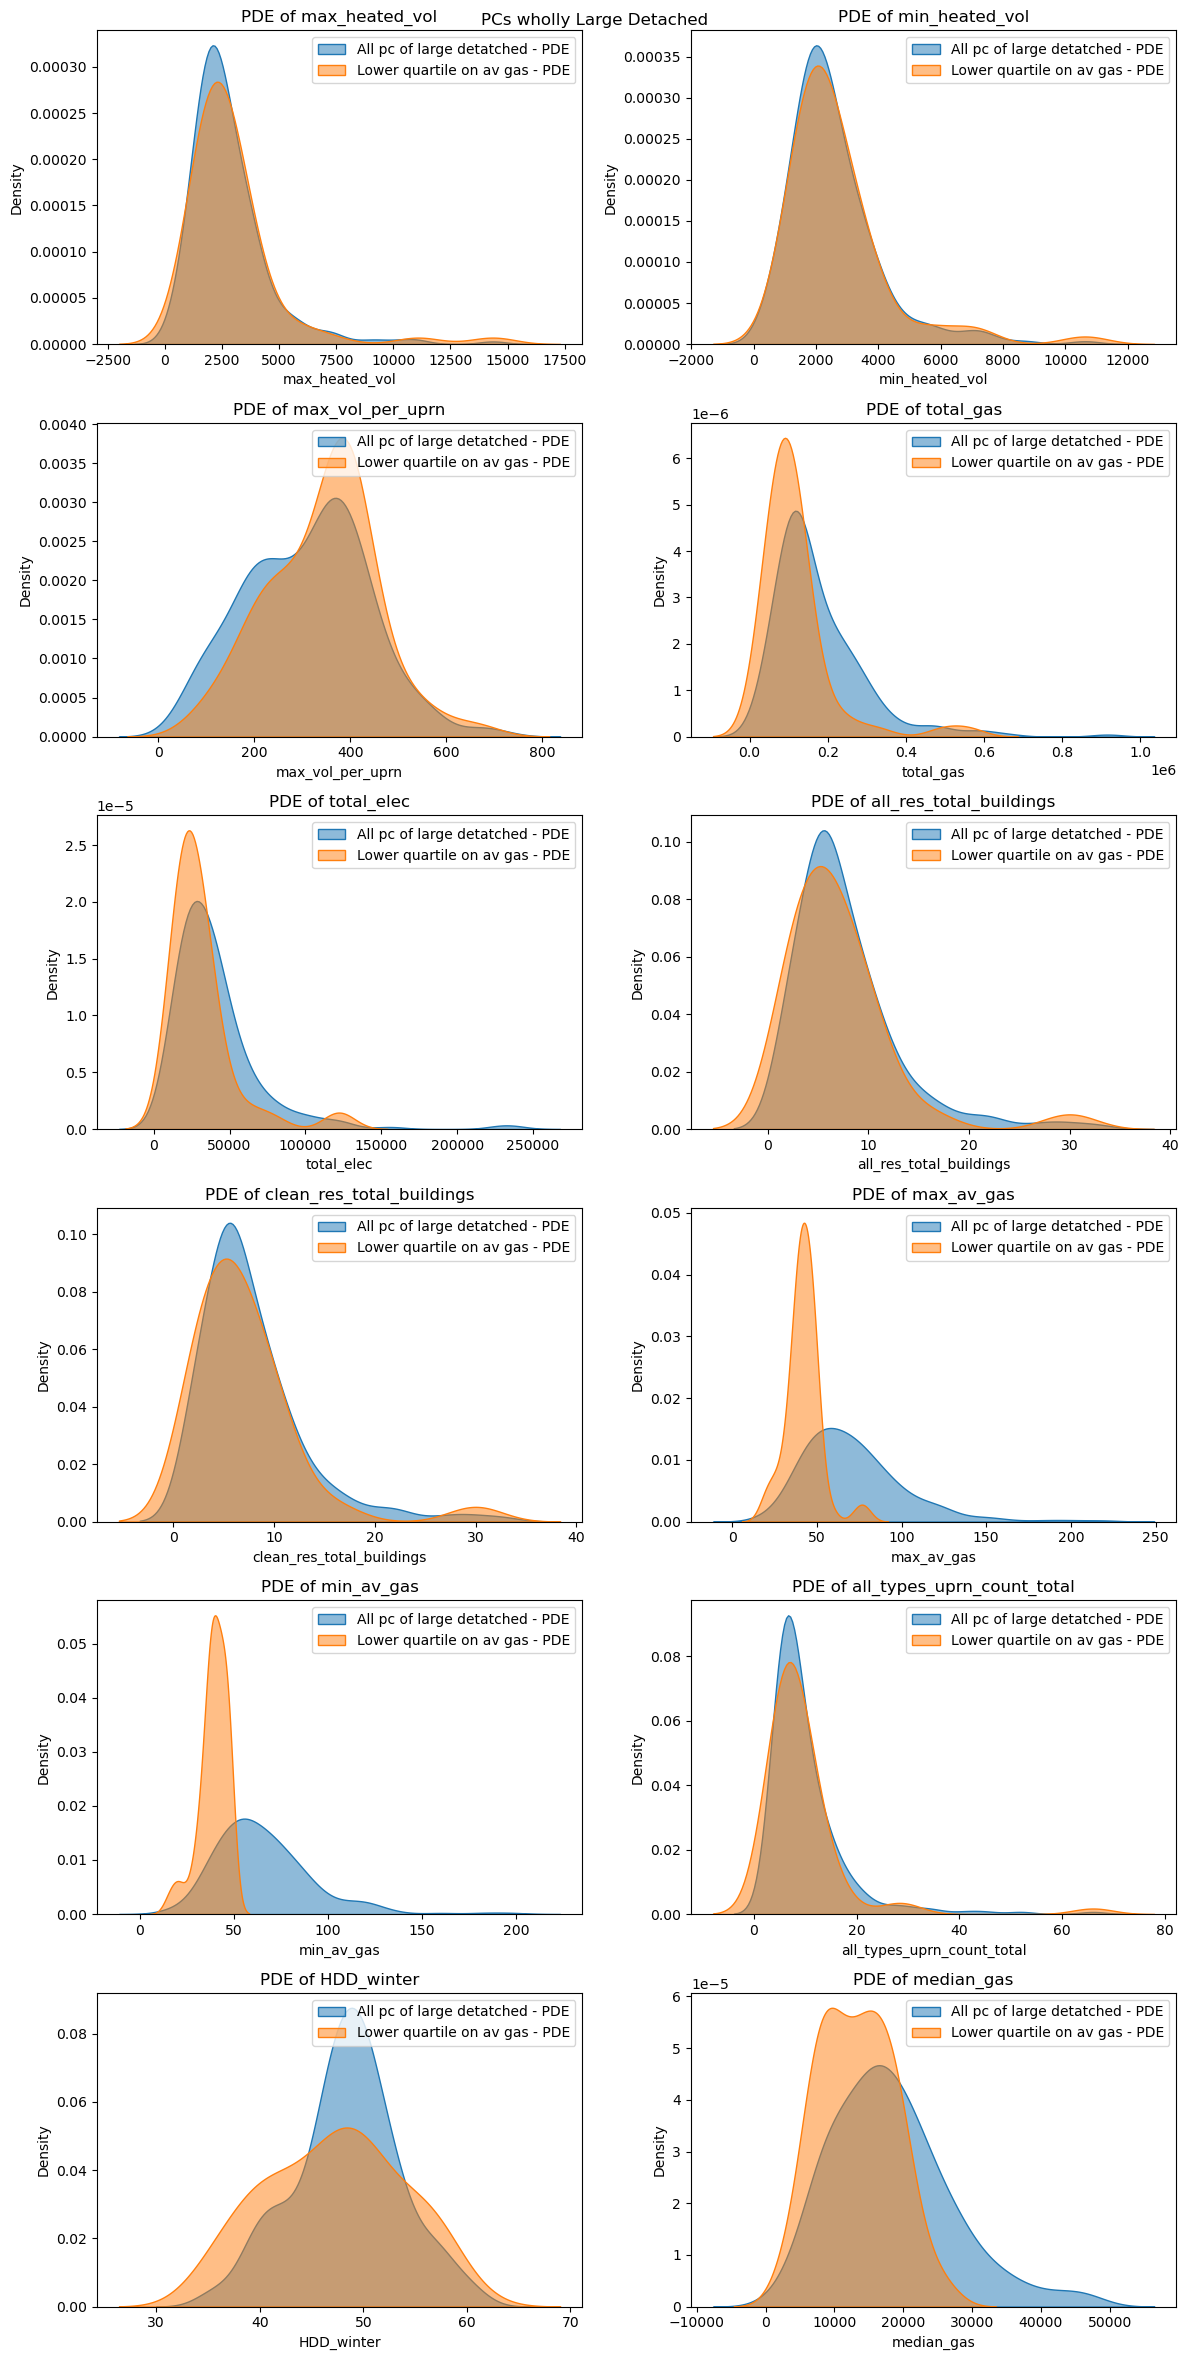

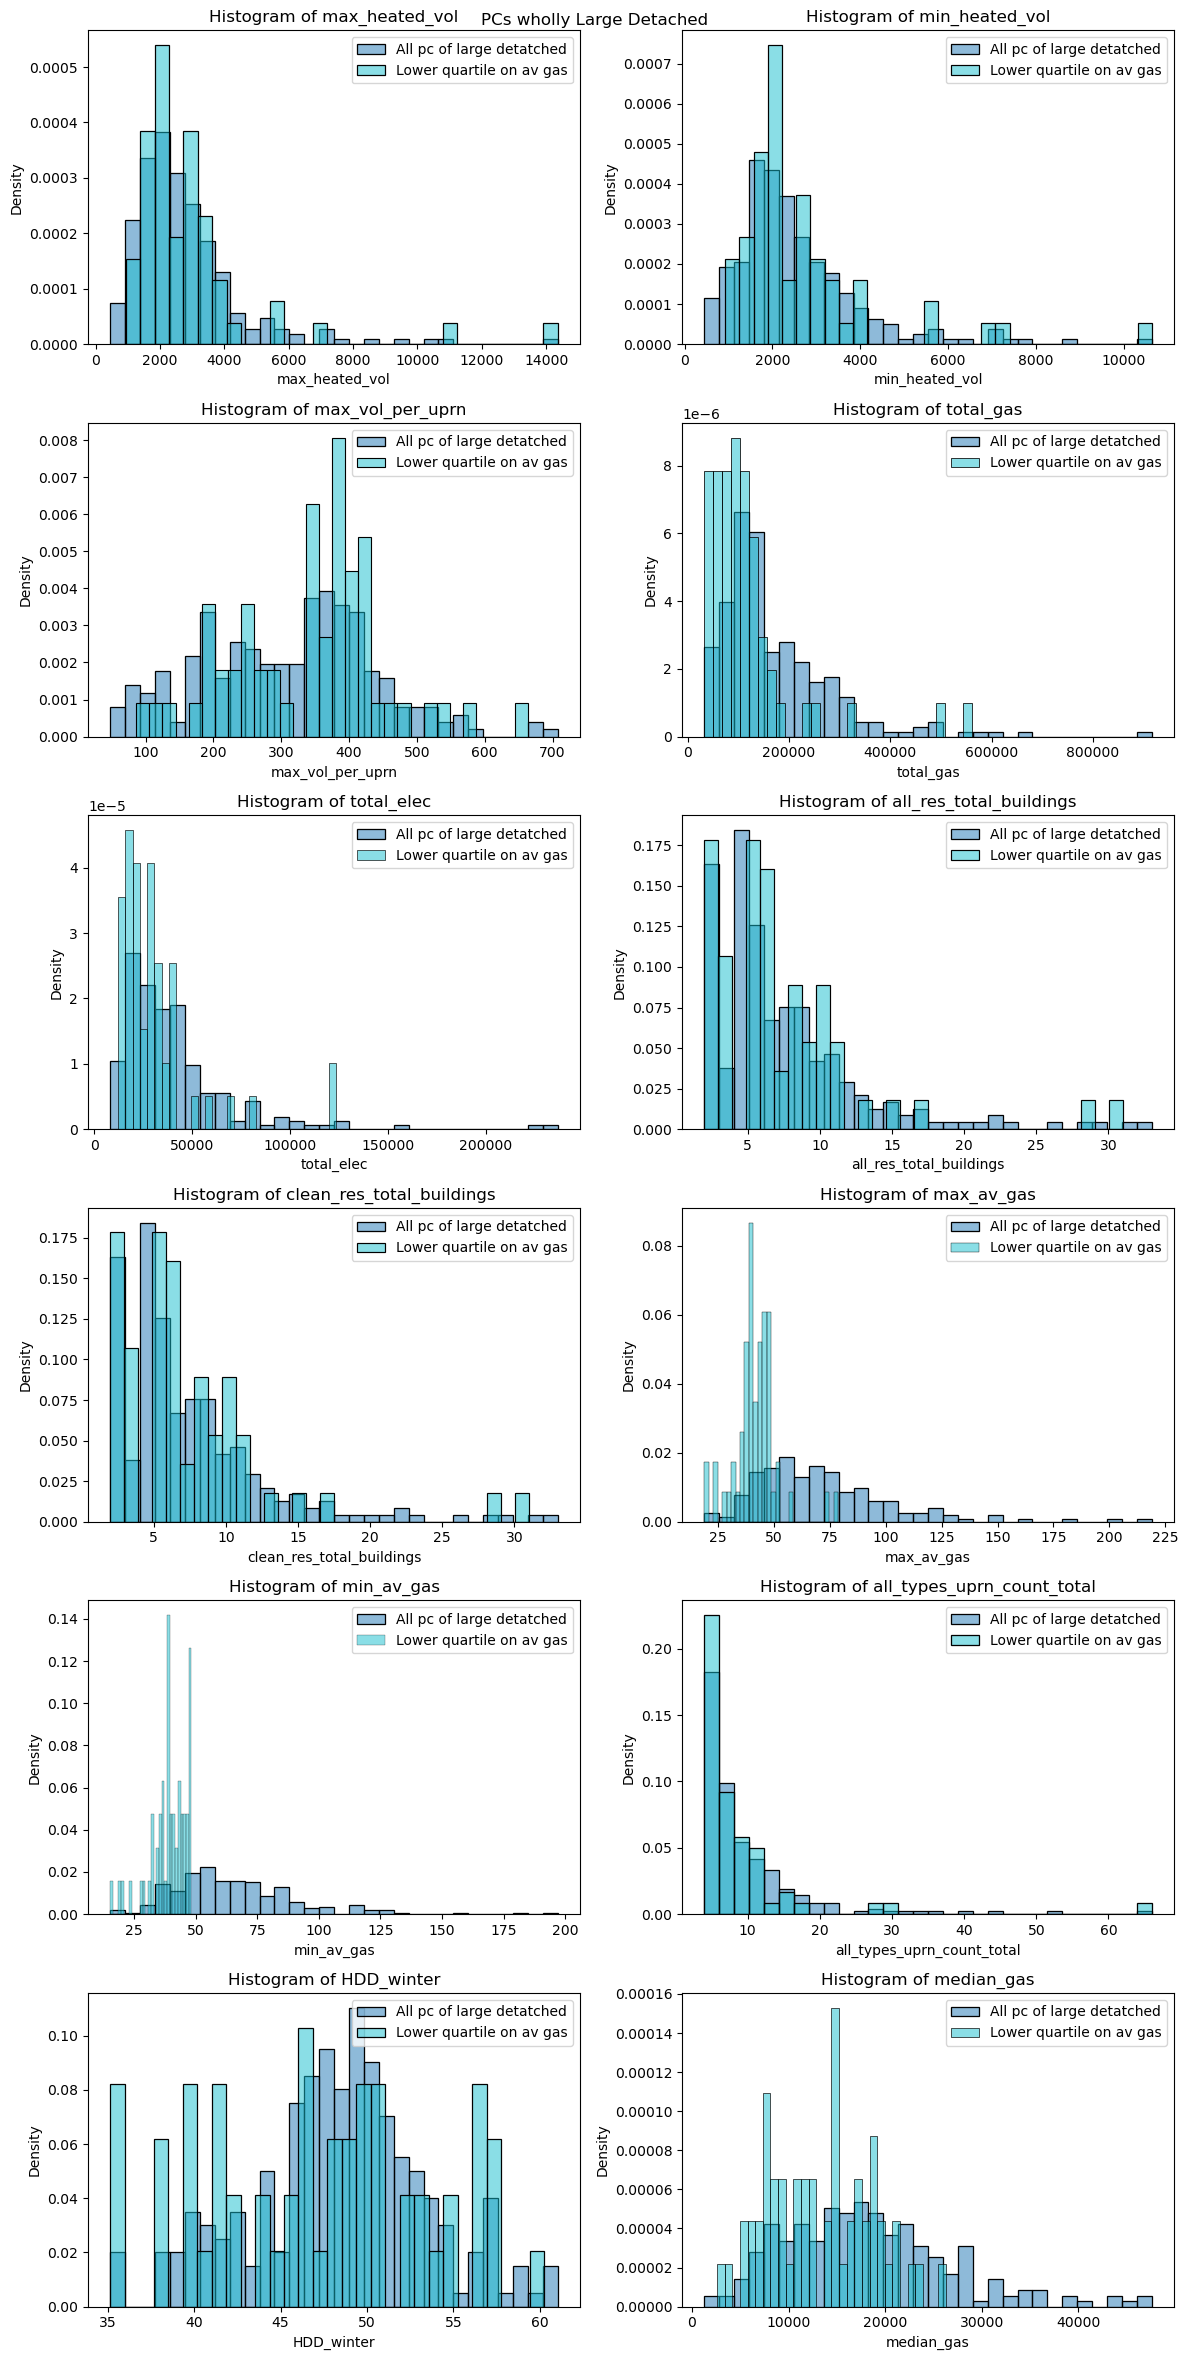

In [64]:
import numpy as np 

col =  'Large detached_pct'

data =  df[df[col]== 100].copy() 
data.min_av_gas.hist()


thresh = data.min_av_gas.quantile(0.25)

data[data['min_av_gas'] < thresh ]

columns = ['max_heated_vol','min_heated_vol',  'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings', 'max_av_gas', 'min_av_gas', 'all_types_uprn_count_total', 'HDD_winter', 'median_gas']
dfs = [data , data[data['min_av_gas'] < thresh ] ] 
df_labels = ['All pc of large detatched', 'Lower quartile on av gas' ] 

# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs wholly Large Detached', alpha = 0.5)
plot_histograms_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs wholly Large Detached', alpha = 0.5)






In [27]:
data.sort_values('min_av_gas')

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas
324211,324211,TR10 8AY,5.0,5.0,0.0,0.0,5.0,1022.199997,1919.000000,2044.399994,...,1.0,0.0,0.0,0.0,15.351538,24.924448,NaN,NaN,1919.000000,26.553174
351672,351672,NR11 8LY,6.0,6.0,0.0,0.0,6.0,1018.099976,2036.199951,2036.199951,...,0.0,0.0,0.0,0.0,18.906228,19.111469,10.083445,10.192909,2036.199951,19.111469
24377,24377,TR3 6BZ,5.0,5.0,0.0,0.0,5.0,848.599991,1358.499985,1697.199982,...,1.0,0.0,0.0,0.0,20.485680,20.714896,11.349034,11.476019,1358.499985,25.879516
367718,367718,EN11 0HU,3.0,5.0,0.0,0.0,3.0,777.000015,1554.000031,1554.000031,...,0.0,0.0,0.0,0.0,23.605148,23.843068,NaN,NaN,1554.000031,23.843068
309111,309111,TR27 4JN,6.0,6.0,0.0,0.0,6.0,1081.600006,1613.600006,2163.200012,...,1.0,0.0,0.0,0.0,28.343579,28.802365,7.569342,7.691864,1613.600006,37.997540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175828,175828,B92 7JG,5.0,15.0,0.0,0.0,5.0,568.900005,1137.800011,1137.800011,...,0.0,0.0,1.0,0.0,126.747497,126.997118,22.769116,22.813958,1135.563593,126.997118
188100,188100,B93 9DB,5.0,5.0,0.0,0.0,5.0,598.099991,1196.199982,1196.199982,...,0.0,0.0,1.0,0.0,135.957334,137.084257,20.436193,20.605585,1196.199982,137.084257
97148,97148,OL4 1DX,5.0,5.0,0.0,0.0,5.0,225.500004,451.000008,451.000008,...,0.0,0.0,0.0,0.0,159.600386,161.554047,26.023349,26.341900,451.000008,161.554047
290689,290689,SR2 9AJ,2.0,8.0,0.0,0.0,2.0,265.799995,360.399994,531.599991,...,0.0,0.0,0.0,0.0,182.351984,183.778188,34.896371,35.169301,360.399994,271.077926


In [29]:
data[data['postcode']=='TR10 8AY'][['total_gas', 'total_elec', 'median_gas', 'avg_gas',  'num_meters_gas', 'clean_res_total_buildings',  'max_heated_vol' , 'clean_res_heated_vol_h_total', 'clean_res_heated_vol_fc_total',  'clean_res_premise_area_total',  'all_res_gross_area_total' ]]

# this postcode seems to be either very well insulated or has some properties unoccupied 

,total_gas,total_elec,median_gas,avg_gas,num_meters_gas,clean_res_total_buildings,max_heated_vol,clean_res_heated_vol_h_total,clean_res_heated_vol_fc_total,clean_res_premise_area_total,all_res_gross_area_total
324211,50955.54154,NaN,8761.55009,10191.108308,5.0,5.0,3319.246699,3319.246699,2044.399994,1022.199997,1919.0


In [31]:
pc = 'EN11 0HU'

data[data['postcode']==pc][['total_gas', 'total_elec', 'median_gas', 'avg_gas',  'num_meters_gas', 'all_res_uprn_count_total',  'clean_res_total_buildings',  'max_heated_vol' , 'clean_res_heated_vol_h_total', 'clean_res_heated_vol_fc_total',  'clean_res_premise_area_total',  'all_res_gross_area_total', 'min_av_gas', 'max_av_gas' ]]
# potentially one empty buuilding / not in use / industrial building mis classified. 1/3 buildings 

,total_gas,total_elec,median_gas,avg_gas,num_meters_gas,all_res_uprn_count_total,clean_res_total_buildings,max_heated_vol,clean_res_heated_vol_h_total,clean_res_heated_vol_fc_total,clean_res_premise_area_total,all_res_gross_area_total,min_av_gas,max_av_gas
367718,37052.127862,NaN,5691.317362,6175.354644,6.0,5.0,3.0,1569.663024,1569.663024,1554.000031,777.000015,1554.000031,23.605148,23.843068


In [35]:
61312.830986 / 1613.600006, 61312.830986/1081.600006 , 61312/2128.742922, 16374.0 / 1613

(37.997540132631855, 56.68715851135083, 28.801974802291323, 10.151270923744576)

In [ ]:
#   if all are bungalows, then instead of 28-37, its 56 
 56.68715851135083

#again, cant know what the occupancy is 

In [38]:
pc='BN1 6HF'
df[df['postcode']==pc]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max_av_gas


In [32]:
pc='TR27 4JN'
data[data['postcode']==pc][['total_gas', 'total_elec', 'median_gas', 'avg_gas',  'num_meters_gas', 'all_res_uprn_count_total',  'clean_res_total_buildings',  'max_heated_vol' , 'clean_res_heated_vol_h_total', 'clean_res_heated_vol_fc_total',  'clean_res_premise_area_total',  'all_res_gross_area_total', 'min_av_gas', 'max_av_gas' ]]

,total_gas,total_elec,median_gas,avg_gas,num_meters_gas,all_res_uprn_count_total,clean_res_total_buildings,max_heated_vol,clean_res_heated_vol_h_total,clean_res_heated_vol_fc_total,clean_res_premise_area_total,all_res_gross_area_total,min_av_gas,max_av_gas
309111,61312.830986,16374.0,9485.33902,10218.805164,6.0,6.0,6.0,2163.200012,2128.742922,2163.200012,1081.600006,1613.600006,28.343579,28.802365


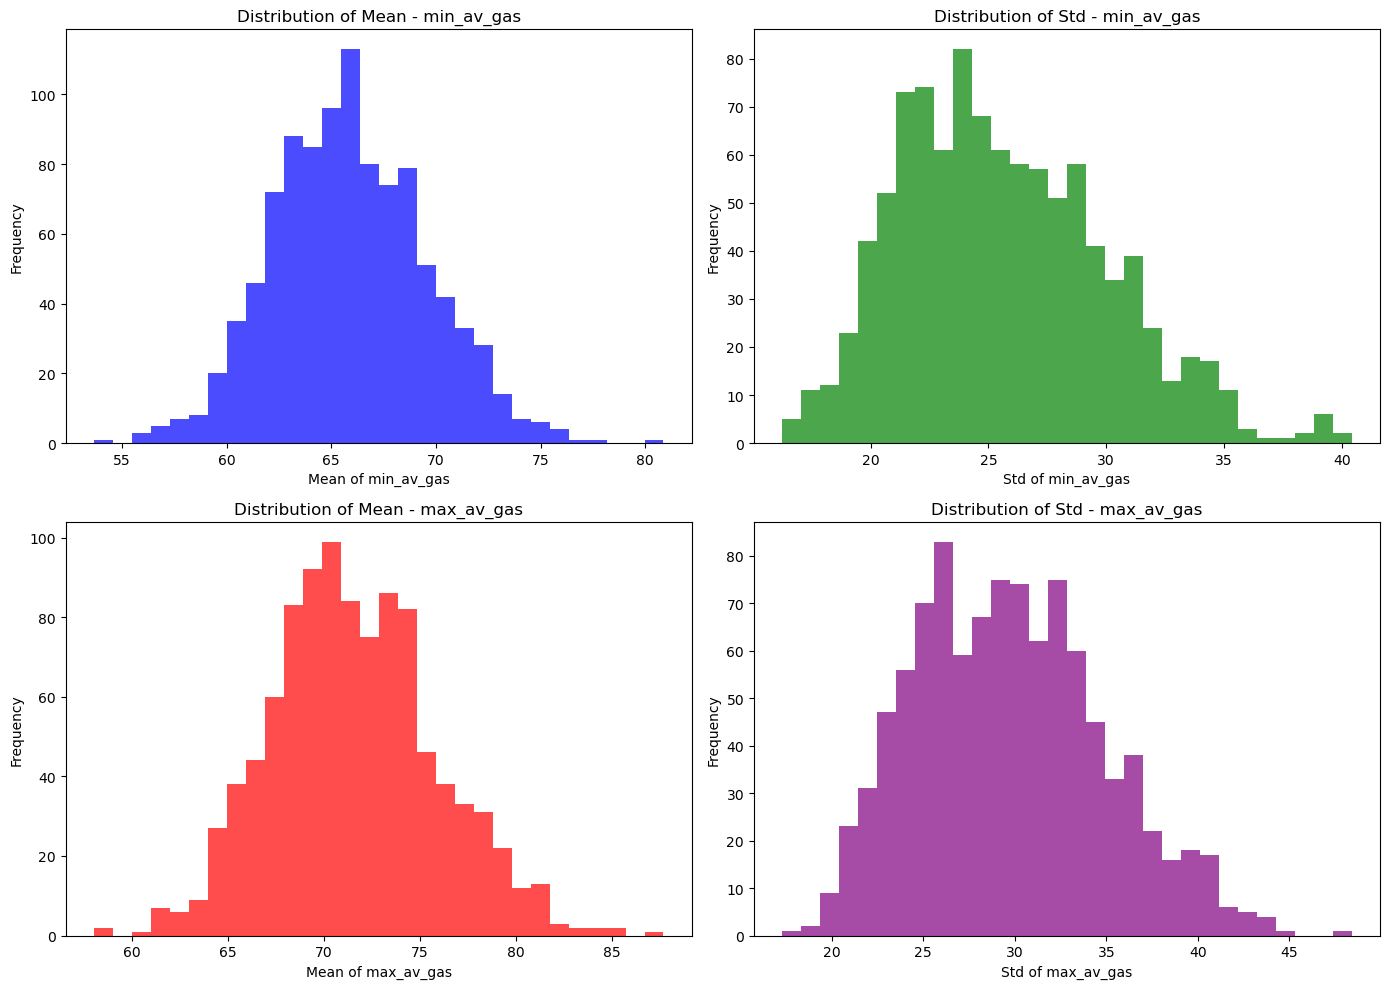

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Parameters
n = 50  # Sample size
iterations = 1000  # Number of iterations

# Lists to store results
mean_min_av_gas_list = []
std_min_av_gas_list = []
mean_max_av_gas_list = []
std_max_av_gas_list = []

# Bootstrapping
for _ in range(iterations):
    sample = data.sample(n, replace=True)
    mean_min_av_gas_list.append(sample['min_av_gas'].mean())
    std_min_av_gas_list.append(sample['min_av_gas'].std())
    mean_max_av_gas_list.append(sample['max_av_gas'].mean())
    std_max_av_gas_list.append(sample['max_av_gas'].std())

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame({
    'mean_min_av_gas': mean_min_av_gas_list,
    'std_min_av_gas': std_min_av_gas_list,
    'mean_max_av_gas': mean_max_av_gas_list,
    'std_max_av_gas': std_max_av_gas_list
})

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mean of min_av_gas
axs[0, 0].hist(results_df['mean_min_av_gas'], bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Distribution of Mean - min_av_gas')
axs[0, 0].set_xlabel('Mean of min_av_gas')
axs[0, 0].set_ylabel('Frequency')

# Std of min_av_gas
axs[0, 1].hist(results_df['std_min_av_gas'], bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Distribution of Std - min_av_gas')
axs[0, 1].set_xlabel('Std of min_av_gas')
axs[0, 1].set_ylabel('Frequency')

# Mean of max_av_gas
axs[1, 0].hist(results_df['mean_max_av_gas'], bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Distribution of Mean - max_av_gas')
axs[1, 0].set_xlabel('Mean of max_av_gas')
axs[1, 0].set_ylabel('Frequency')

# Std of max_av_gas
axs[1, 1].hist(results_df['std_max_av_gas'], bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Distribution of Std - max_av_gas')
axs[1, 1].set_xlabel('Std of max_av_gas')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


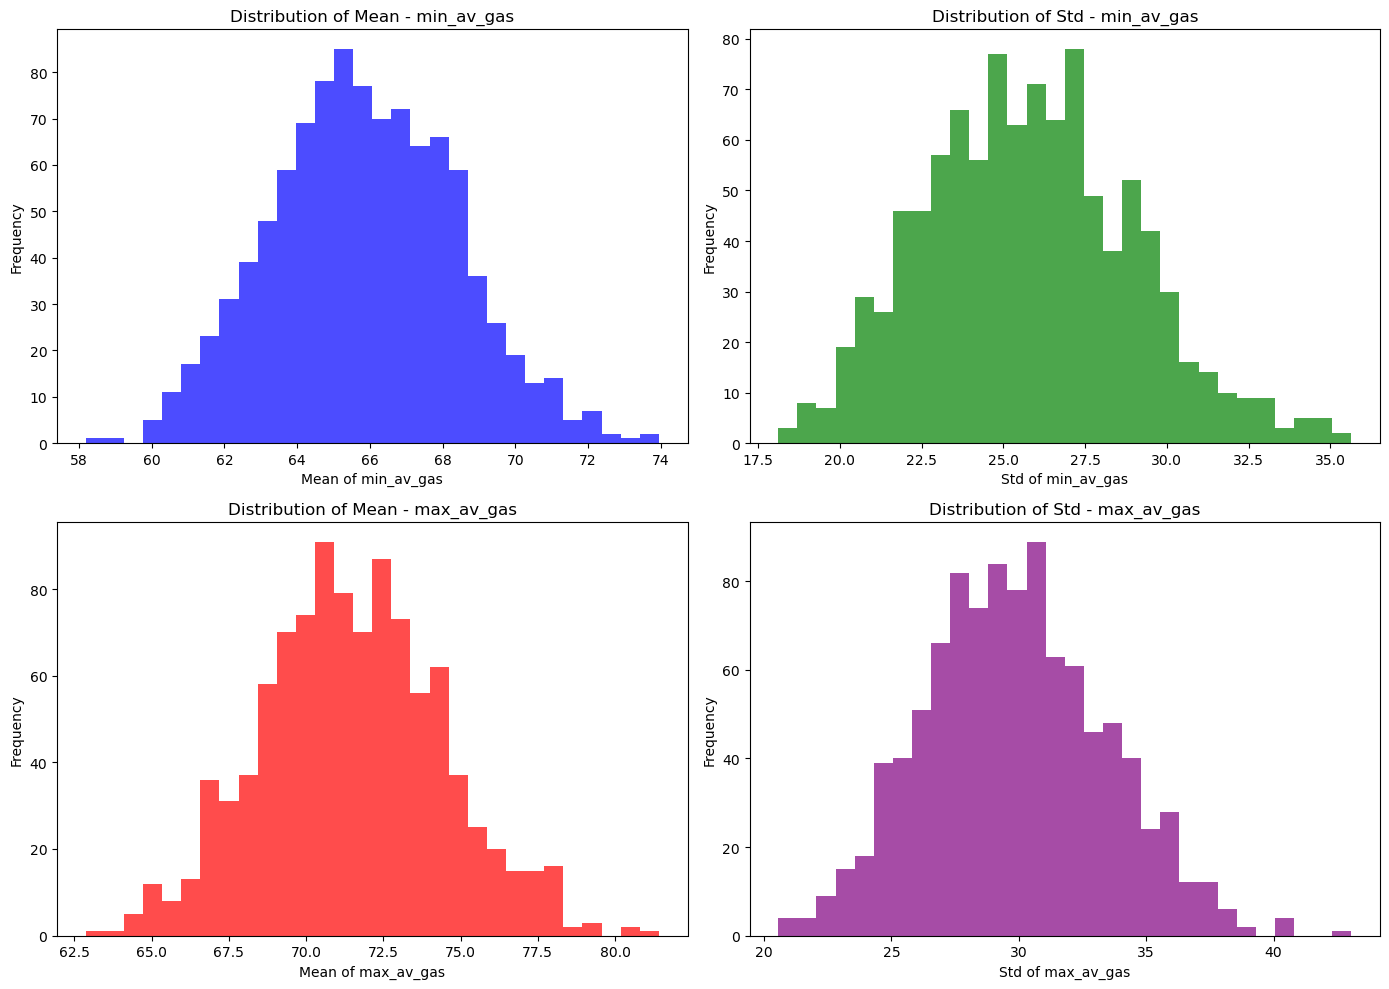

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Parameters
n = 100  # Sample size
iterations = 1000  # Number of iterations

# Lists to store results
mean_min_av_gas_list = []
std_min_av_gas_list = []
mean_max_av_gas_list = []
std_max_av_gas_list = []

# Bootstrapping
for _ in range(iterations):
    sample = data.sample(n, replace=True)
    mean_min_av_gas_list.append(sample['min_av_gas'].mean())
    std_min_av_gas_list.append(sample['min_av_gas'].std())
    mean_max_av_gas_list.append(sample['max_av_gas'].mean())
    std_max_av_gas_list.append(sample['max_av_gas'].std())

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame({
    'mean_min_av_gas': mean_min_av_gas_list,
    'std_min_av_gas': std_min_av_gas_list,
    'mean_max_av_gas': mean_max_av_gas_list,
    'std_max_av_gas': std_max_av_gas_list
})

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mean of min_av_gas
axs[0, 0].hist(results_df['mean_min_av_gas'], bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Distribution of Mean - min_av_gas')
axs[0, 0].set_xlabel('Mean of min_av_gas')
axs[0, 0].set_ylabel('Frequency')

# Std of min_av_gas
axs[0, 1].hist(results_df['std_min_av_gas'], bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Distribution of Std - min_av_gas')
axs[0, 1].set_xlabel('Std of min_av_gas')
axs[0, 1].set_ylabel('Frequency')

# Mean of max_av_gas
axs[1, 0].hist(results_df['mean_max_av_gas'], bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Distribution of Mean - max_av_gas')
axs[1, 0].set_xlabel('Mean of max_av_gas')
axs[1, 0].set_ylabel('Frequency')

# Std of max_av_gas
axs[1, 1].hist(results_df['std_max_av_gas'], bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Distribution of Std - max_av_gas')
axs[1, 1].set_xlabel('Std of max_av_gas')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


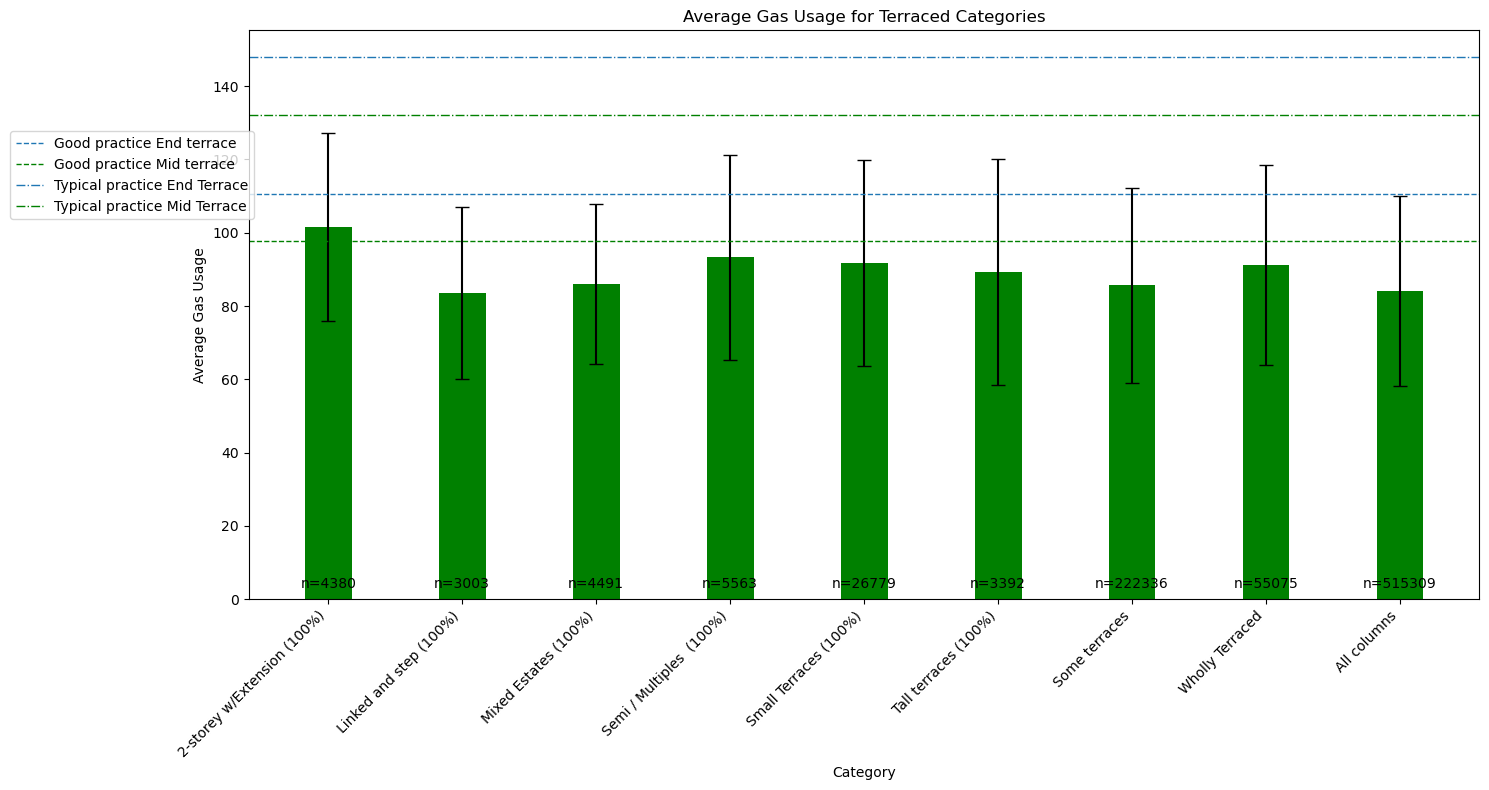

In [76]:

# Define the relevant columns
terraced_columns = [
    '2 storeys terraces with t rear extension_pct',
    'Linked and step linked premises_pct',
    'Planned balanced mixed estates_pct',
    'Semi type house in multiples_pct',
    'Small low terraces_pct',
    'Tall terraces 3-4 storeys_pct'
]

terraced_columns_dict = {
    '2 storeys terraces with t rear extension_pct' : '2-storey w/Extension',
    'Linked and step linked premises_pct': 'Linked and step',
    'Planned balanced mixed estates_pct': 'Mixed Estates',
    'Semi type house in multiples_pct' : 'Semi / Multiples ',
    'Small low terraces_pct': 'Small Terraces',
    'Tall terraces 3-4 storeys_pct': 'Tall terraces'
}

# Initialize lists to store results
mean_av_gas_list = []
pooled_std_av_gas_list = []
counts = []
labels = []

# Helper function to calculate pooled standard deviation
def pooled_std(std1, n1, std2, n2):
    return np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

# Loop over each category, filter data where the percentage is 100, calculate mean and pooled std, and store the results
for col in terraced_columns:
    filtered_df = df[df[col] == 100]
    if not filtered_df.empty:
        mean_min_gas = filtered_df['min_av_gas'].mean()
        std_min_gas = filtered_df['min_av_gas'].std()
        mean_max_gas = filtered_df['max_av_gas'].mean()
        std_max_gas = filtered_df['max_av_gas'].std()
        
        n_min = filtered_df['min_av_gas'].count()
        n_max = filtered_df['max_av_gas'].count()
        
        pooled_std_gas = pooled_std(std_min_gas, n_min, std_max_gas, n_max)
        
        mean_av_gas_list.append((mean_min_gas + mean_max_gas) / 2)
        pooled_std_av_gas_list.append(pooled_std_gas)
        counts.append(filtered_df.shape[0])
        labels.append(f'{terraced_columns_dict[col]} (100%)')

# For combo columns, filter the data where the sum of the relevant columns is greater than 0% and less than 100%
filtered_combo_df = df[(df[terraced_columns ].sum(axis=1) > 0 ) & (df[terraced_columns].sum(axis=1) < 100)]
if not filtered_combo_df.empty:
    mean_min_gas_combo = filtered_combo_df['min_av_gas'].mean()
    std_min_gas_combo = filtered_combo_df['min_av_gas'].std()
    mean_max_gas_combo = filtered_combo_df['max_av_gas'].mean()
    std_max_gas_combo = filtered_combo_df['max_av_gas'].std()
    
    n_min_combo = filtered_combo_df['min_av_gas'].count()
    n_max_combo = filtered_combo_df['max_av_gas'].count()
    
    pooled_std_gas_combo = pooled_std(std_min_gas_combo, n_min_combo, std_max_gas_combo, n_max_combo)
    
    mean_av_gas_list.append((mean_min_gas_combo + mean_max_gas_combo) / 2)
    pooled_std_av_gas_list.append(pooled_std_gas_combo)
    counts.append(filtered_combo_df.shape[0])
    labels.append('Some terraces')

# For pure terraced, filter the data where the sum of the relevant terraced columns is exactly 100%
filtered_pure_terraced_df = df[(df[terraced_columns].sum(axis=1) == 100)]
if not filtered_pure_terraced_df.empty:
    mean_min_gas_pure_terraced = filtered_pure_terraced_df['min_av_gas'].mean()
    std_min_gas_pure_terraced = filtered_pure_terraced_df['min_av_gas'].std()
    mean_max_gas_pure_terraced = filtered_pure_terraced_df['max_av_gas'].mean()
    std_max_gas_pure_terraced = filtered_pure_terraced_df['max_av_gas'].std()
    
    n_min_pure_terraced = filtered_pure_terraced_df['min_av_gas'].count()
    n_max_pure_terraced = filtered_pure_terraced_df['max_av_gas'].count()
    
    pooled_std_gas_pure_terraced = pooled_std(std_min_gas_pure_terraced, n_min_pure_terraced, std_max_gas_pure_terraced, n_max_pure_terraced)
    
    mean_av_gas_list.append((mean_min_gas_pure_terraced + mean_max_gas_pure_terraced) / 2)
    pooled_std_av_gas_list.append(pooled_std_gas_pure_terraced)
    counts.append(filtered_pure_terraced_df.shape[0])
    labels.append('Wholly Terraced')

# For all columns (mixed and pure), calculate the overall mean and pooled std
mean_min_gas_all = df['min_av_gas'].mean()
std_min_gas_all = df['min_av_gas'].std()
mean_max_gas_all = df['max_av_gas'].mean()
std_max_gas_all = df['max_av_gas'].std()

n_min_all = df['min_av_gas'].count()
n_max_all = df['max_av_gas'].count()

pooled_std_gas_all = pooled_std(std_min_gas_all, n_min_all, std_max_gas_all, n_max_all)

mean_av_gas_list.append((mean_min_gas_all + mean_max_gas_all) / 2)
pooled_std_av_gas_list.append(pooled_std_gas_all)
counts.append(df.shape[0])
labels.append('All columns')

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 8))

# Define the width of the bars and their positions
bar_width = 0.35
index = np.arange(len(mean_av_gas_list))

# Plot the bars
bars = ax.bar(index, mean_av_gas_list, bar_width, yerr=pooled_std_av_gas_list, capsize=5, color='green')

# Customizing the plot
ax.set_xlabel('Category')
ax.set_ylabel('Average Gas Usage')
ax.set_title('Average Gas Usage for Terraced Categories')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add count annotations to the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'n={count}', xy=(bar.get_x() + bar.get_width() / 2, 1),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', color='black')


# Add horizontal lines for Terraced Houses
# ax.axhline(119, linestyle='dashed', linewidth=1, label='Good practice End terrace')
# ax.axhline(105, color='g', linestyle='dashed', linewidth=1, label='Good practice Mid terrace')
# ax.axhline(159, linestyle='dashdot', linewidth=1, label='Typical practice End Terrace')
# ax.axhline(142, color='g', linestyle='dashdot', linewidth=1, label='Typical practice Mid Terrace')

occupancy= 0.93 
# Add horizontal lines for Terraced Houses
ax.axhline(119 *occupancy , linestyle='dashed', linewidth=1, label='Good practice End terrace')
ax.axhline(105 * occupancy , color='g', linestyle='dashed', linewidth=1, label='Good practice Mid terrace')
ax.axhline(159 * occupancy, linestyle='dashdot', linewidth=1, label='Typical practice End Terrace')
ax.axhline(142 * occupancy, color='g', linestyle='dashdot', linewidth=1, label='Typical practice Mid Terrace')


ax.legend(bbox_to_anchor=(0.01, 0.835))


plt.tight_layout()
plt.show()

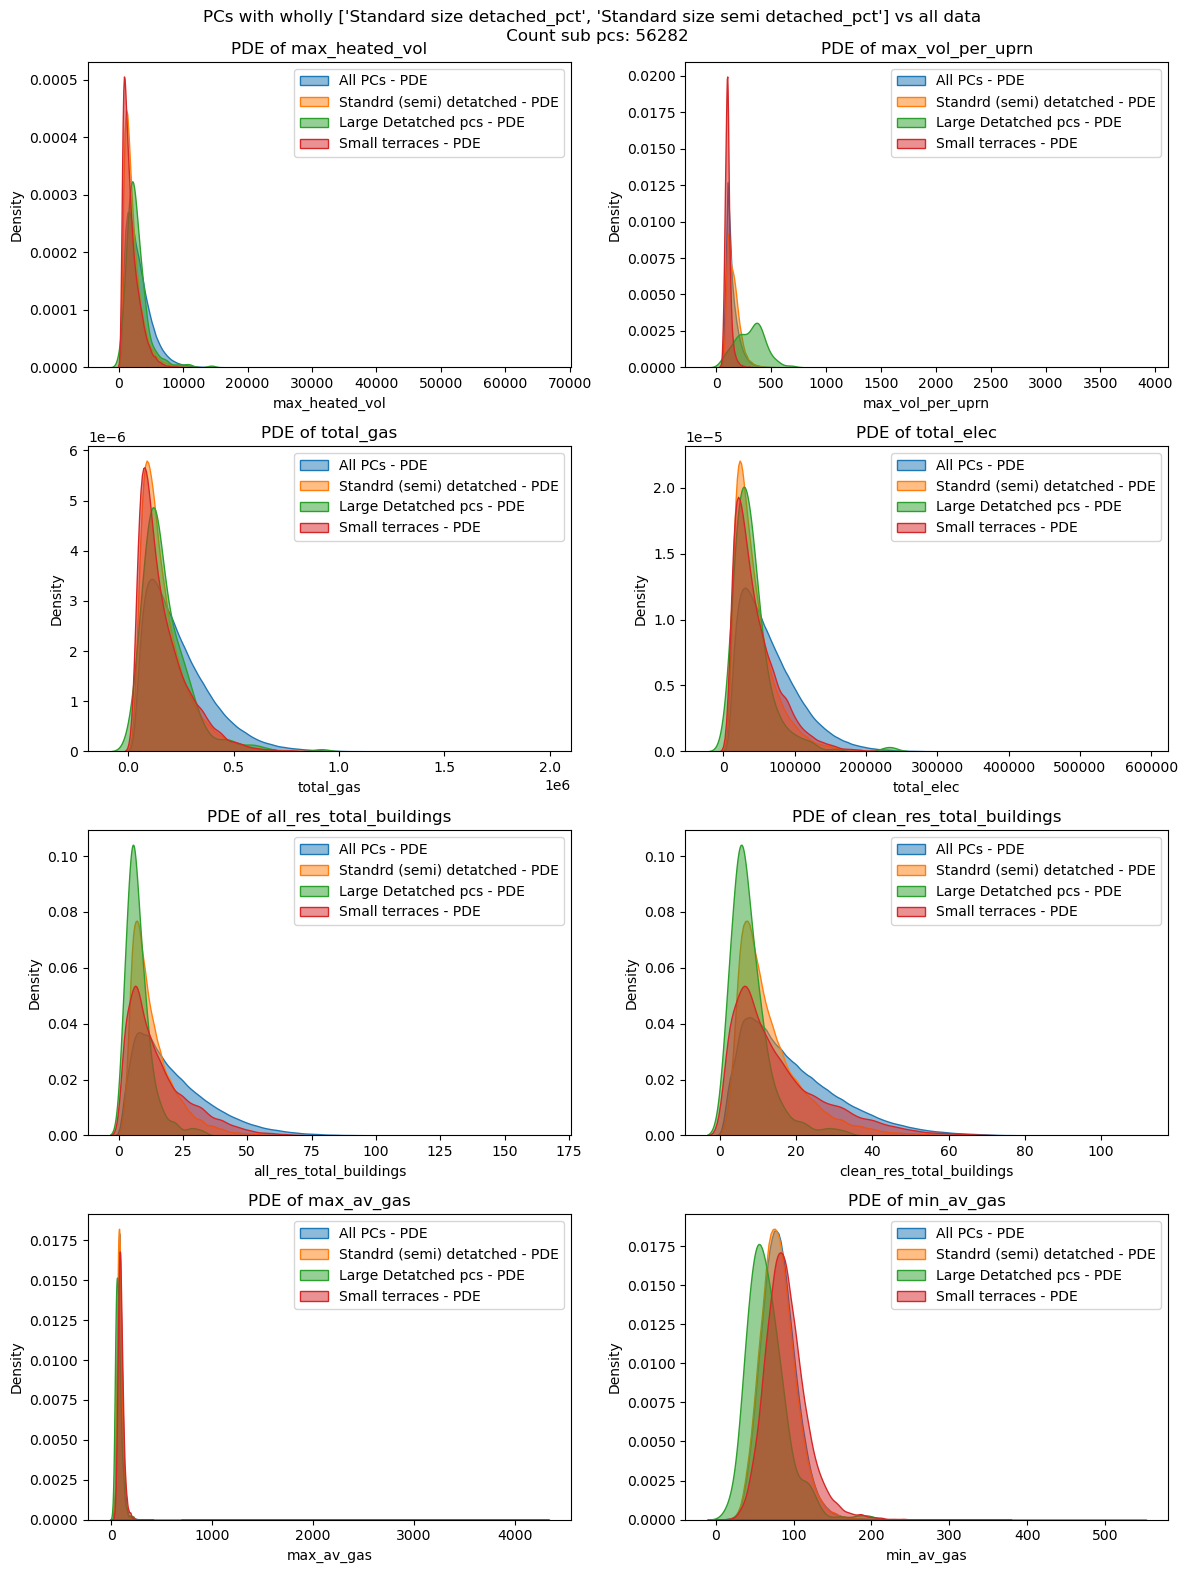

In [156]:
col= [ 'Standard size detached_pct', 'Standard size semi detached_pct']
data = df[ (df[col[0]] + df[col[1]] ) ==100].copy() 
c =len(data)
col2 = 'Large detached_pct'
data2 = df[df[col2]==100].copy()

# col3 =  'Small low terraces_pct'
# data3 = df[df[col3]==100].copy() 

columns = ['max_heated_vol', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings', 'max_av_gas', 'min_av_gas' ]
dfs = [df , data, data2, data3]
df_labels = ['All PCs', 'Standrd (semi) detatched', 'Large Detatched pcs', 'Small terraces']

# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs with wholly {col} vs all data \n Count sub pcs: {c}', alpha = 0.5)


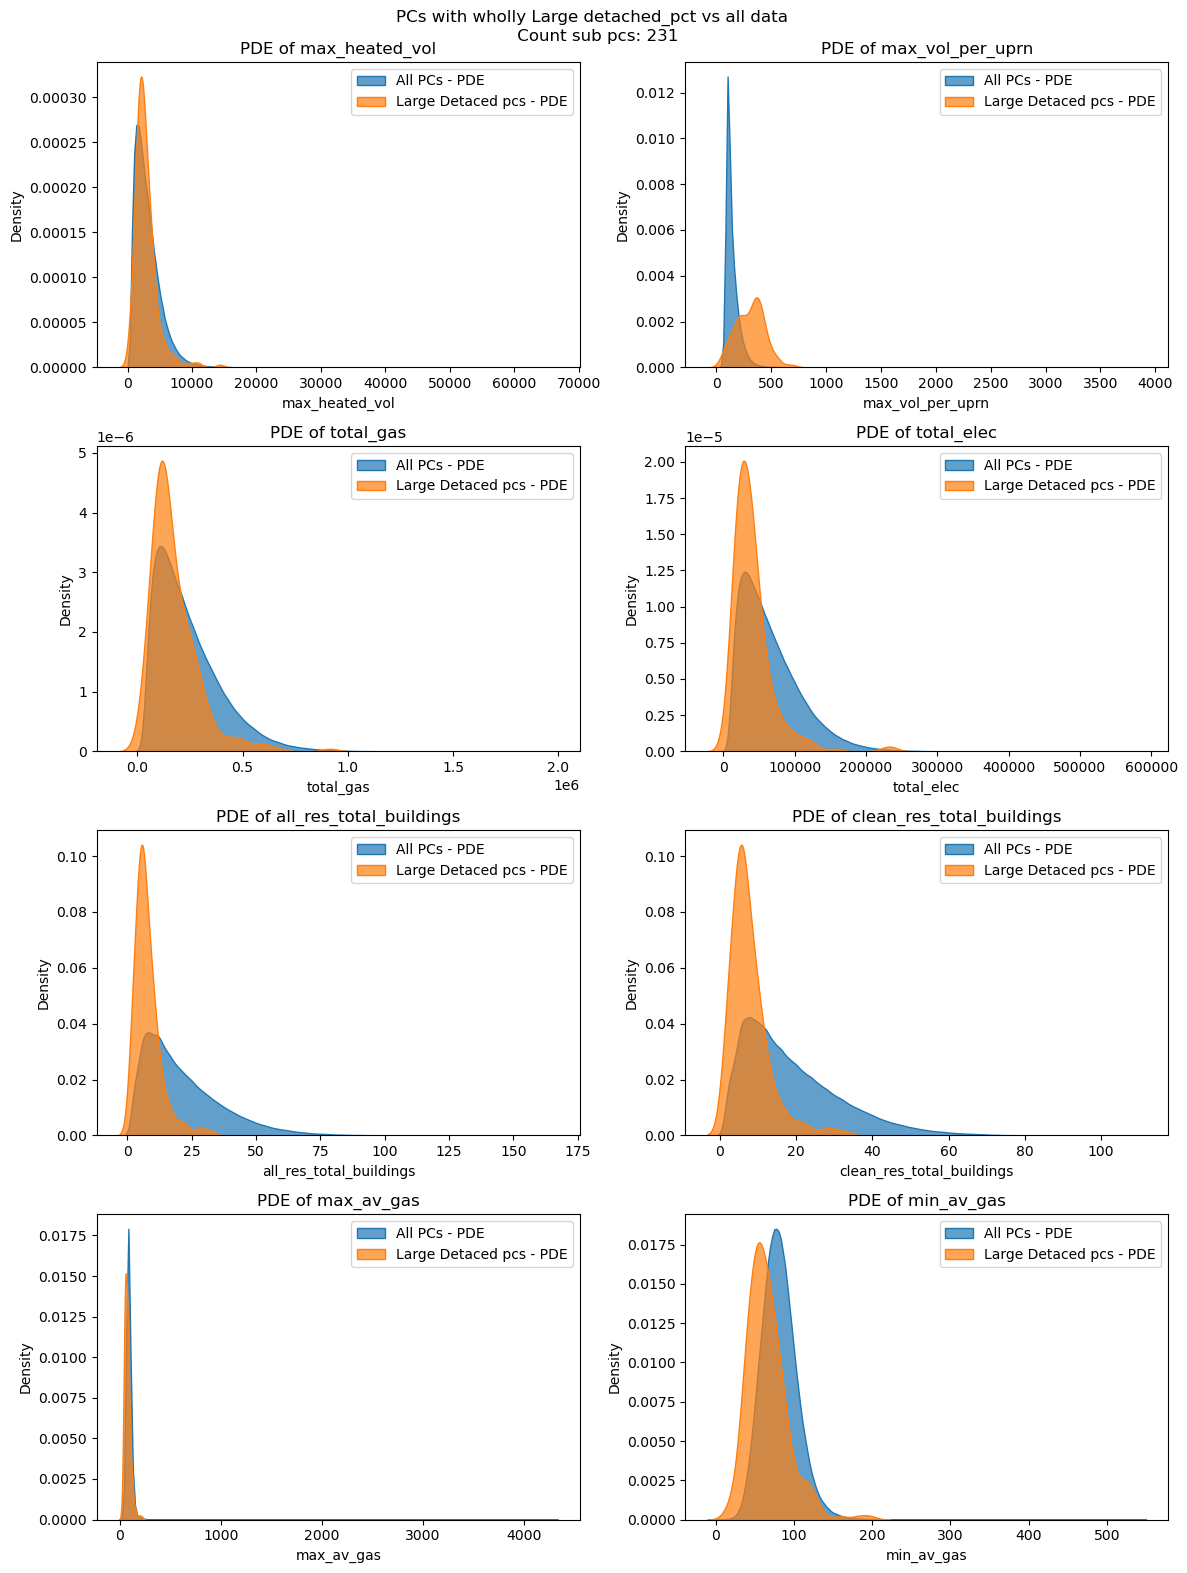

In [65]:
col= 'Large detached_pct'

data = df[df[col]==100]
c =len(data)

columns = ['max_heated_vol', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings', 'max_av_gas', 'min_av_gas' ]
dfs = [df , data]
df_labels = ['All PCs', 'Large Detaced pcs']
# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False, title=f'PCs with wholly {col} vs all data \n Count sub pcs: {c}')


In [ ]:
print(f'For pcs with wholly {col}, the range is      92.905827')

In [45]:
d = data [data['min_av_gas'] < 30].copy()  

In [46]:
d.sort_values('av')

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_NW,region_SC,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec
1524,1524,TA8 1RJ,10.0,10.0,0.0,0.0,10.0,996.600006,1203.900009,1250.450008,...,0.0,0.0,1.0,0.0,0.0,0.0,27.542565,41.404641,11.068110,16.638650
5054,5054,EX2 8FB,6.0,6.0,0.0,0.0,6.0,1094.200005,1846.699997,2188.400009,...,0.0,0.0,1.0,0.0,0.0,0.0,27.870606,29.026338,4.954702,5.160163
7928,7928,TQ3 3QT,7.0,7.0,0.0,0.0,7.0,768.999992,1054.999992,1537.999985,...,0.0,0.0,1.0,0.0,0.0,0.0,28.455487,28.984129,11.686284,11.903390
12377,12377,DT4 0TQ,5.0,5.0,0.0,0.0,5.0,518.000000,1036.000000,1036.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,24.581291,26.311540,8.604730,9.210407
13259,13259,PL9 9QB,13.0,9.0,0.0,0.0,13.0,1001.399993,2002.799986,2002.799986,...,0.0,0.0,1.0,0.0,0.0,0.0,28.531199,34.701001,7.224286,8.786520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433622,433622,DN40 2EP,7.0,7.0,0.0,0.0,7.0,701.000000,1190.599998,1402.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,28.541581,28.735532,10.398146,10.468805
448579,448579,WR14 4RY,11.0,9.0,0.0,0.0,11.0,2071.099998,4142.199997,4142.199997,...,0.0,0.0,0.0,0.0,1.0,0.0,20.168653,24.377020,2.956613,3.573536
461220,461220,EH52 6GW,7.0,6.0,0.0,0.0,7.0,988.299995,1976.599991,1976.599991,...,0.0,1.0,0.0,0.0,0.0,0.0,28.184903,28.651568,NaN,NaN
469824,469824,IV30 6AS,6.0,6.0,0.0,0.0,6.0,1060.700005,2121.400009,2121.400009,...,0.0,1.0,0.0,0.0,0.0,0.0,26.709077,26.981894,11.550166,11.668144


In [58]:
pc = 'DN40 2EP'
df[df['postcode']==pc][['num_meters_gas', 'all_types_uprn_count_total', 'min_heated_vol', 'total_elec', 'total_gas', 'median_gas', 'avg_gas']]

,num_meters_gas,all_types_uprn_count_total,min_heated_vol,total_elec,total_gas,median_gas,avg_gas
433622,7.0,7.0,1392.537163,14578.2,40015.296899,4236.446352,5716.470986


In [8]:
# cehck uprns volume 
import sys 
sys.path.append('/Users/gracecolverd/New_dataset')
from src.postcode_utils import get_postcode_shapefile, load_onsud_from_batch, find_batch_from_pc, find_postcode_for_ONSUD_file, find_data_pc, find_data_pc_spatialjoin

p='/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291'


INPUT_GPK = '/Volumes/T9/Data_downloads/Versik_building_data/2024_03_22_updated_data/UKBuildings_Edition_15_new_format_upn.gpkg'
from src.pre_process_buildings import pre_process_building_data 

import os 
import pandas as pd
import re 
import geopandas as gpd
from shapely.geometry import box 
from src.multi_thread import merge_temp_logs_to_main, generate_batch_list
from src.utils  import check_merge_files 
import glob 

def find_data_pc_spatialjoin_weak(pc, input_gpk):
    """
    Find buildings based on spatial join  
    """
    sph = get_postcode_shapefile(pc) 
    
    bbox = box(*sph.total_bounds)
    buildings = gpd.read_file(input_gpk, bbox=bbox)
    uprn_match = buildings.sjoin(sph, how='inner', predicate='overlaps')
    return uprn_match

# get uprn 
pc_shp = '/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291'

def find_polysd(pc):
    bb = find_batch_from_pc(pc)
    ons = load_onsud_from_batch(bb)
    data , pc_df  = find_postcode_for_ONSUD_file(ons, path_to_pc_shp_folder=pc_shp)
    print('finding uprn match ')
    
    
    uprn_match = find_data_pc(pc, data, input_gpk=INPUT_GPK)
    uprn_match.to_crs(epsg='4326', inplace=True )
    print('finding shapefile')
    sph = get_postcode_shapefile(pc)
    sph.to_crs(epsg='4326', inplace=True)
    lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]   
    print('finding sptail joins')
    up_spatial = find_data_pc_spatialjoin(pc,  input_gpk=INPUT_GPK)
    up_spatial.to_crs(epsg='4326', inplace=True)

    return uprn_match, up_spatial 

In [36]:

pc =  'DN40 2EP'
pc='TR10 8AY'
pc='TR27 4JN'
up, ups = find_polysd(pc)



/Users/gracecolverd/New_dataset/src/postcode_utils.py:23: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(onsud)


227475
Len of missing rows  0
finding uprn match 
finding shapefile


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_90906/1529130685.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_90906/1529130685.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]


finding sptail joins


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_90906/1529130685.py:49: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  up_spatial = find_data_pc_spatialjoin(pc,  input_gpk=INPUT_GPK)


In [37]:
up

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,height,premise_area,building_area,address_area,gross_area,...,uprn,uprn_count,uprn_distance,toid,map_age,map_floors,map_use,map_simple_use,upn,geometry
1,1990-1999,NaN,Residential,Large detached,2,8.0,185.300003,185.300003,370.600006,370.600006,...,1.000401e+11,1,0.0,osgb1000016924583,1990-1999,2,Residential,Residential,22257162,"MULTIPOLYGON (((-5.42506 50.17639, -5.42512 50..."
5,1980-1989,NaN,Residential,Large detached,1,5.6,171.800003,171.800003,171.800003,171.800003,...,1.000401e+11,1,0.0,osgb1000016924584,1980-1989,1,Residential,Residential,22775599,"MULTIPOLYGON (((-5.42500 50.17655, -5.42506 50..."
6,1980-1989,NaN,Residential,Large detached,2,9.2,174.199997,174.199997,348.399994,348.399994,...,1.000401e+11,1,0.0,osgb1000016924585,1980-1989,2,Residential,Residential,608519,"MULTIPOLYGON (((-5.42495 50.17670, -5.42500 50..."
7,1980-1989,NaN,Residential,Large detached,1,5.6,171.100006,171.100006,171.100006,171.100006,...,1.000401e+11,1,0.0,osgb1000016924587,1980-1989,1,Residential,Residential,1488832,"MULTIPOLYGON (((-5.42511 50.17710, -5.42485 50..."
15,1980-1989,NaN,Residential,Large detached,2,8.4,172.500000,172.500000,345.000000,345.000000,...,1.000401e+11,1,0.0,osgb1000016924586,1980-1989,2,Residential,Residential,22988591,"MULTIPOLYGON (((-5.42487 50.17684, -5.42493 50..."
16,Post 1999,NaN,Residential,Large detached,1,5.6,206.699997,206.699997,206.699997,206.699997,...,1.001448e+10,1,0.0,osgb1000002033671824,Post 1999,1,Residential,Residential,23302497,"MULTIPOLYGON (((-5.42489 50.17687, -5.42479 50..."


In [11]:
from src.pre_process_buildings import  load_avg_floor_count
fc = load_avg_floor_count()

In [12]:
fc

,map_simple_use,premise_age_bucketed,height_bucket,total_count,global_average_floorcount,updated
0,Mixed Use,1919-1944,2-3m,12,1.000000,True
1,Mixed Use,1919-1944,3-4m,666,1.000000,True
2,Mixed Use,1919-1944,4-5m,203,1.000000,True
3,Mixed Use,1919-1944,5-6m,772,1.987047,False
4,Mixed Use,1919-1944,6-7m,1765,2.000000,False
...,...,...,...,...,...,...
1211,Residential,Unknown date,55-60m,119,19.169251,True
1212,Residential,Unknown date,60-70m,174,21.874638,True
1213,Residential,Unknown date,70-80m,57,25.244039,True
1214,Residential,Unknown date,80-90m,14,28.972222,True


In [14]:
d = pre_process_buildings(up, fc) 

In [16]:
d

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,height,premise_area,building_area,address_area,gross_area,...,validated_fc,fc_filled,height_filled,height_filled_bucket,global_average_floorcount,updated,heated_prem_area_fc,heated_prem_area_h,base_floor,basement_heated_vol_max
0,1990-1999,NaN,Residential,Large detached,1,8.700000,240.199997,240.199997,240.199997,240.199997,...,1.0,1.0,NaN,NaN,NaN,NaN,240.199997,NaN,0,0.0
1,1990-1999,1999.0,Residential,Large detached,4,23.299999,176.000000,176.000000,704.000000,704.000000,...,4.0,4.0,NaN,NaN,NaN,NaN,704.000000,NaN,0,0.0
2,1990-1999,1999.0,Residential,Large detached,2,9.800000,182.100006,182.100006,364.200012,364.200012,...,2.0,2.0,NaN,NaN,NaN,NaN,364.200012,NaN,0,0.0
3,1990-1999,1999.0,Residential,Large detached,2,7.600000,186.699997,186.699997,373.399994,373.399994,...,2.0,2.0,NaN,NaN,NaN,NaN,373.399994,NaN,0,0.0
4,1990-1999,1996.0,Residential,Large detached,1,16.299999,237.199997,237.199997,237.199997,237.199997,...,1.0,1.0,NaN,NaN,NaN,NaN,237.199997,NaN,0,0.0


In [15]:
d.gross_area.sum()

1919.0

In [7]:
from src.fuel_calc import process_postcode_fuel 

In [10]:
udf

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,height,premise_area,building_area,address_area,gross_area,...,validated_fc,fc_filled,height_filled,height_filled_bucket,global_average_floorcount,updated,heated_prem_area_fc,heated_prem_area_h,base_floor,basement_heated_vol_max
0,1990-1999,NaN,Residential,Large detached,1,8.700000,240.199997,240.199997,240.199997,240.199997,...,1.0,1.0,NaN,NaN,NaN,NaN,240.199997,NaN,0,0.0
1,1990-1999,1999.0,Residential,Large detached,4,23.299999,176.000000,176.000000,704.000000,704.000000,...,4.0,4.0,NaN,NaN,NaN,NaN,704.000000,NaN,0,0.0
2,1990-1999,1999.0,Residential,Large detached,2,9.800000,182.100006,182.100006,364.200012,364.200012,...,2.0,2.0,NaN,NaN,NaN,NaN,364.200012,NaN,0,0.0
3,1990-1999,1999.0,Residential,Large detached,2,7.600000,186.699997,186.699997,373.399994,373.399994,...,2.0,2.0,NaN,NaN,NaN,NaN,373.399994,NaN,0,0.0
4,1990-1999,1996.0,Residential,Large detached,1,16.299999,237.199997,237.199997,237.199997,237.199997,...,1.0,1.0,NaN,NaN,NaN,NaN,237.199997,NaN,0,0.0


In [73]:
udf.premise_area.sum(),  udf.gross_area.sum(),  udf.heated_prem_area_fc.sum()

(701.0, 1190.599998474121, 1190.599998474121)

In [77]:
df.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [79]:
df[df['postcode'] ==pc][['min_heated_vol', 'max_heated_vol', 'clean_res_heated_vol_fc_total' , 'clean_res_gross_area_total' ]]

,min_heated_vol,max_heated_vol,clean_res_heated_vol_fc_total,clean_res_gross_area_total
433622,1392.537163,1402.0,1402.0,1190.599998


In [81]:
df[df['clean_res_gross_area_total'] < df['min_heated_vol']]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_NW,region_SC,region_SW,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec
10,10,EX8 3JE,17.0,15.0,0.0,0.0,17.0,1542.399988,2695.999979,2945.759977,...,0.0,0.0,1.0,0.0,0.0,0.0,57.079533,59.248454,16.849166,17.489405
20,20,TQ3 3TX,28.0,27.0,0.0,0.0,28.0,2192.299976,3357.199959,4384.599953,...,0.0,0.0,1.0,0.0,0.0,0.0,46.194842,46.680671,13.640495,13.783951
21,21,TQ4 7SG,23.0,24.0,0.0,0.0,23.0,2053.399994,3666.199997,4106.799988,...,0.0,0.0,1.0,0.0,0.0,0.0,55.568002,56.600362,13.684887,13.939130
22,22,TQ4 6JW,37.0,33.0,0.0,0.0,37.0,3496.400002,5429.500009,6679.947832,...,0.0,0.0,1.0,0.0,0.0,0.0,49.935220,52.493334,12.430065,13.066841
23,23,TQ4 6HQ,4.0,5.0,0.0,0.0,4.0,400.300003,680.300003,800.600006,...,0.0,0.0,1.0,0.0,0.0,0.0,81.956293,82.818225,21.201827,21.424806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515278,515278,W8 6QT,12.0,13.0,0.0,0.0,12.0,803.600010,2492.100006,2492.100033,...,0.0,0.0,0.0,0.0,0.0,0.0,109.912070,115.476130,28.566789,30.012920
515280,515280,W8 7DA,26.0,25.0,0.0,0.0,26.0,2186.500010,9030.300026,9030.300041,...,0.0,0.0,0.0,0.0,0.0,0.0,103.641748,114.088444,30.693454,33.787238
515299,515299,W8 6XD,10.0,13.0,0.0,0.0,10.0,627.600006,1938.000015,1938.000019,...,0.0,0.0,0.0,0.0,0.0,0.0,143.895781,151.827205,28.796652,30.383901
515306,515306,W8 7AY,7.0,44.0,0.0,0.0,7.0,588.099995,2870.999969,3528.599968,...,0.0,0.0,0.0,0.0,0.0,0.0,84.206882,102.524169,20.409086,24.848617


In [86]:
df.new_max_av_gas.describe()

count    515309.000000
mean         88.139425
std          28.589553
min           2.259161
25%          70.871047
50%          84.958695
75%         101.007778
max        4334.086199
Name: new_max_av_gas, dtype: float64

In [89]:
data['min_av_gas'].describe()

count    251.000000
mean      92.905827
std       27.739318
min       33.487103
25%       73.573011
50%       92.496758
75%      107.269021
max      195.219094
Name: min_av_gas, dtype: float64

In [91]:
df[df['postcode']==pc][['new_max_av_gas', 'max_av_gas']]

,new_max_av_gas,max_av_gas
433622,33.609354,28.735532


In [92]:
data [data['min_av_gas'] < 30]

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_WA,region_WM,region_YH,min_av_gas,max_av_gas,min_av_elec,max_av_elec,ultra_min_heated_area,new_max+av_gas,new_max_av_gas


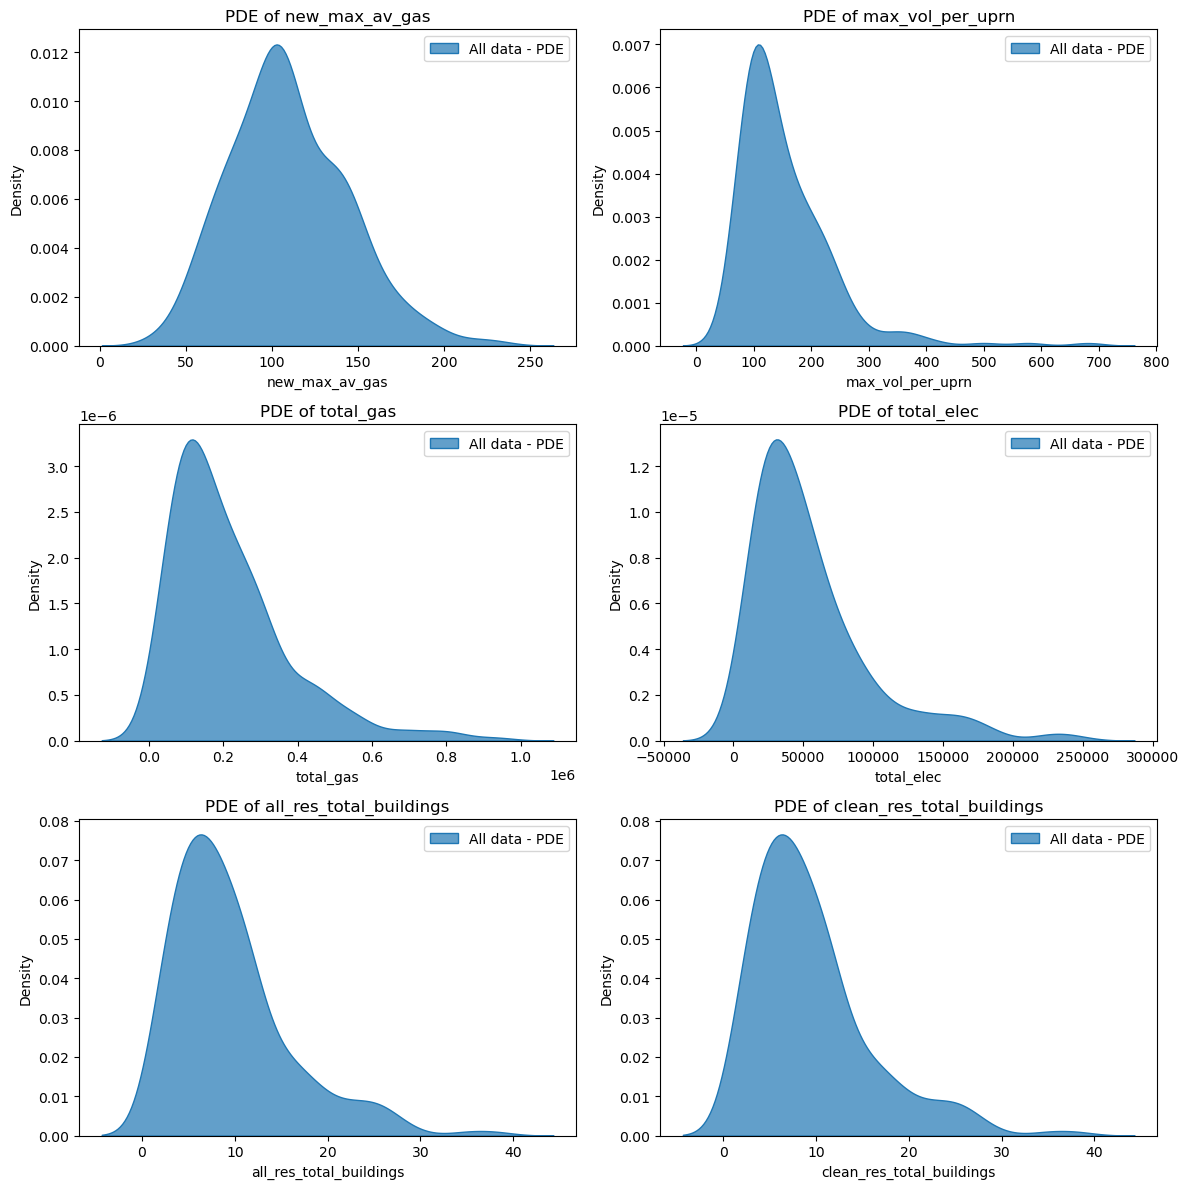

In [87]:
data = df[df[col]==100]

columns = ['new_max_av_gas', 'max_vol_per_uprn', 'total_gas', 'total_elec' , 'all_res_total_buildings', 'clean_res_total_buildings' ]
dfs = [data [data['min_av_gas'] < 30] , data]
df_labels = ['Lower gas', 'All data']
# Call the function to compare multiple DataFrames and columns with labels
plot_pde_multiple_columns(dfs, columns , df_labels, show_dotted_lines=False)
